<a href="https://colab.research.google.com/github/SaralaMuthu/Learntocode/blob/master/MultipleModels_BPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:https://github.com/simonorozcoarias/ML_DL_microArrays/blob/master/TareaDB11Tumores-9Algortimos-V4.ipynb

**Import of Libraries**


In [2]:
import seaborn as sn; sn.set()
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

from keras.layers import Dropout
from keras.constraints import maxnorm
#Using TensorFlow backend.
#File read


In [ ]:
!pip install np_utils

**File Read**

In [3]:
set_option("display.max_rows", 15)
pd.options.mode.chained_assignment = None

filename = '/content/final_pcc_hsiclasso_pcc_classify_v2.csv'
training_data = pd.read_csv(filename)
training_data


,class,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1,6.058347,5.814461,5.801438,8.976212,6.094476,7.945438,8.458857,8.099870,7.194560,3.954753
1,1,5.965764,5.490646,5.754695,8.619474,5.914907,7.490775,8.324116,8.043330,6.878149,3.829151
2,0,6.421407,6.119181,5.883096,9.150813,5.880171,8.142788,8.531074,8.257496,7.186702,3.988083
3,0,6.583360,6.198601,5.590706,8.931668,6.100550,8.007928,8.478457,8.184697,7.038035,4.344671
4,1,6.511919,6.015423,6.243790,8.479766,5.811102,7.945585,8.353219,8.122240,6.429814,3.945785
...,...,...,...,...,...,...,...,...,...,...,...
83,1,5.912027,4.913103,5.903322,8.720251,5.956816,7.887614,7.763354,8.039298,7.249012,3.137541
84,1,6.208369,5.547031,6.142902,8.586013,5.851758,7.763872,8.393716,8.112968,7.155887,3.735024
85,0,6.373025,5.793194,5.960923,8.638485,5.982387,7.943807,8.254582,8.410985,7.411180,3.648166
86,0,6.363613,5.764954,6.181275,8.701669,6.133437,7.892919,8.307789,8.461546,7.490823,3.724879


Basic **statistics**

In [4]:
training_data.describe()

,class,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.556818,6.079276,5.608683,5.805663,8.765578,6.215064,7.908728,8.197321,8.149692,6.881384,3.651888
std,0.499608,0.345177,0.454663,0.376820,0.228172,0.475873,0.234606,0.275995,0.159530,0.390437,0.292933
min,0.000000,5.138477,4.428922,4.899057,7.926802,4.687596,7.376239,7.297774,7.777899,5.773674,3.137541
25%,0.000000,5.865112,5.321479,5.528569,8.639358,5.871645,7.763080,8.024488,8.039181,6.618325,3.415787
50%,1.000000,6.083213,5.634709,5.802662,8.782946,6.149912,7.923074,8.276006,8.147665,6.945292,3.614445
75%,1.000000,6.304189,5.926676,6.104840,8.944778,6.524999,8.041401,8.394619,8.257620,7.185634,3.861368
max,1.000000,6.779354,6.587910,6.580449,9.186978,7.275797,8.549471,8.751051,8.612585,7.567332,4.402478


In [5]:
# class dist|ribution
print(training_data.groupby('class').size())

class
0    39
1    49
dtype: int64


**Data Imputation**

In [ ]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values='NaN', strategy='median', axis=1)
#imputer = imputer.fit(training_data)
#training_data = imputer.transform(training_data)
#training_data

**Separation of Labels and Features**

In [6]:
label_vectors = training_data['class'].values
feature_vectors = training_data.drop(['class'], axis=1).values

In [7]:
label_vectors

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [8]:
feature_vectors

array([[6.05834729, 5.8144607 , 5.80143802, 8.97621189, 6.09447641,
        7.9454381 , 8.45885712, 8.09987039, 7.19456007, 3.95475287],
       [5.96576406, 5.49064577, 5.75469535, 8.61947425, 5.91490746,
        7.49077534, 8.32411564, 8.04333036, 6.87814924, 3.82915054],
       [6.42140725, 6.11918148, 5.8830956 , 9.15081279, 5.8801711 ,
        8.14278803, 8.53107357, 8.25749587, 7.18670183, 3.98808335],
       [6.58335986, 6.1986007 , 5.59070588, 8.93166793, 6.10055031,
        8.00792795, 8.47845748, 8.18469713, 7.03803518, 4.34467131],
       [6.51191943, 6.01542279, 6.24379024, 8.47976606, 5.81110225,
        7.94558515, 8.35321926, 8.12223966, 6.42981419, 3.94578529],
       [6.6517083 , 6.2727572 , 6.3966906 , 8.51840555, 5.66136479,
        8.01915139, 8.37084884, 8.03882905, 6.5207263 , 3.88949632],
       [6.63725926, 6.15830226, 5.87654265, 9.07510456, 7.25660687,
        8.23666545, 8.75105114, 8.25799182, 6.4470922 , 4.20928074],
       [6.19560032, 5.91977066, 5.7130776

**Information Scaling**

In [9]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

**Information Split without Scaling**

In [10]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, label_vectors,
                                                                test_size=validation_size, random_state=seed)

In [11]:
X_train.shape

(70, 10)

**Information Split with Scaling**

In [12]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors,
                                                                                        test_size=validation_size,
                                                                                        random_state=seed)

**PCA without Scaling**

In [13]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_train)
X_trainPCA = pca.transform(X_train)
X_validationPCA=pca.transform(X_validation)

In [14]:
print('X_PCA:',X_trainPCA.shape)

X_PCA: (70, 7)


**PCA with scaling**

In [15]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors)
feature_vectorsPCA = pca.transform(feature_vectors)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors_scaler)
feature_vectorsPCA_Scaler = pca.transform(feature_vectors_scaler)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_trainScaler)
X_trainPCAScaler = pca.transform(X_trainScaler)
X_validationPCAScaler=pca.transform(X_validationScaler)

In [16]:
print('X_PCA:',X_trainPCAScaler.shape)

X_PCA: (70, 8)


**Metrics**

In [17]:
def metrics(Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(2), range(2))
    plt.figure(figsize = (20,14))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size
    plt.show()

**Hierarchical Clustering**

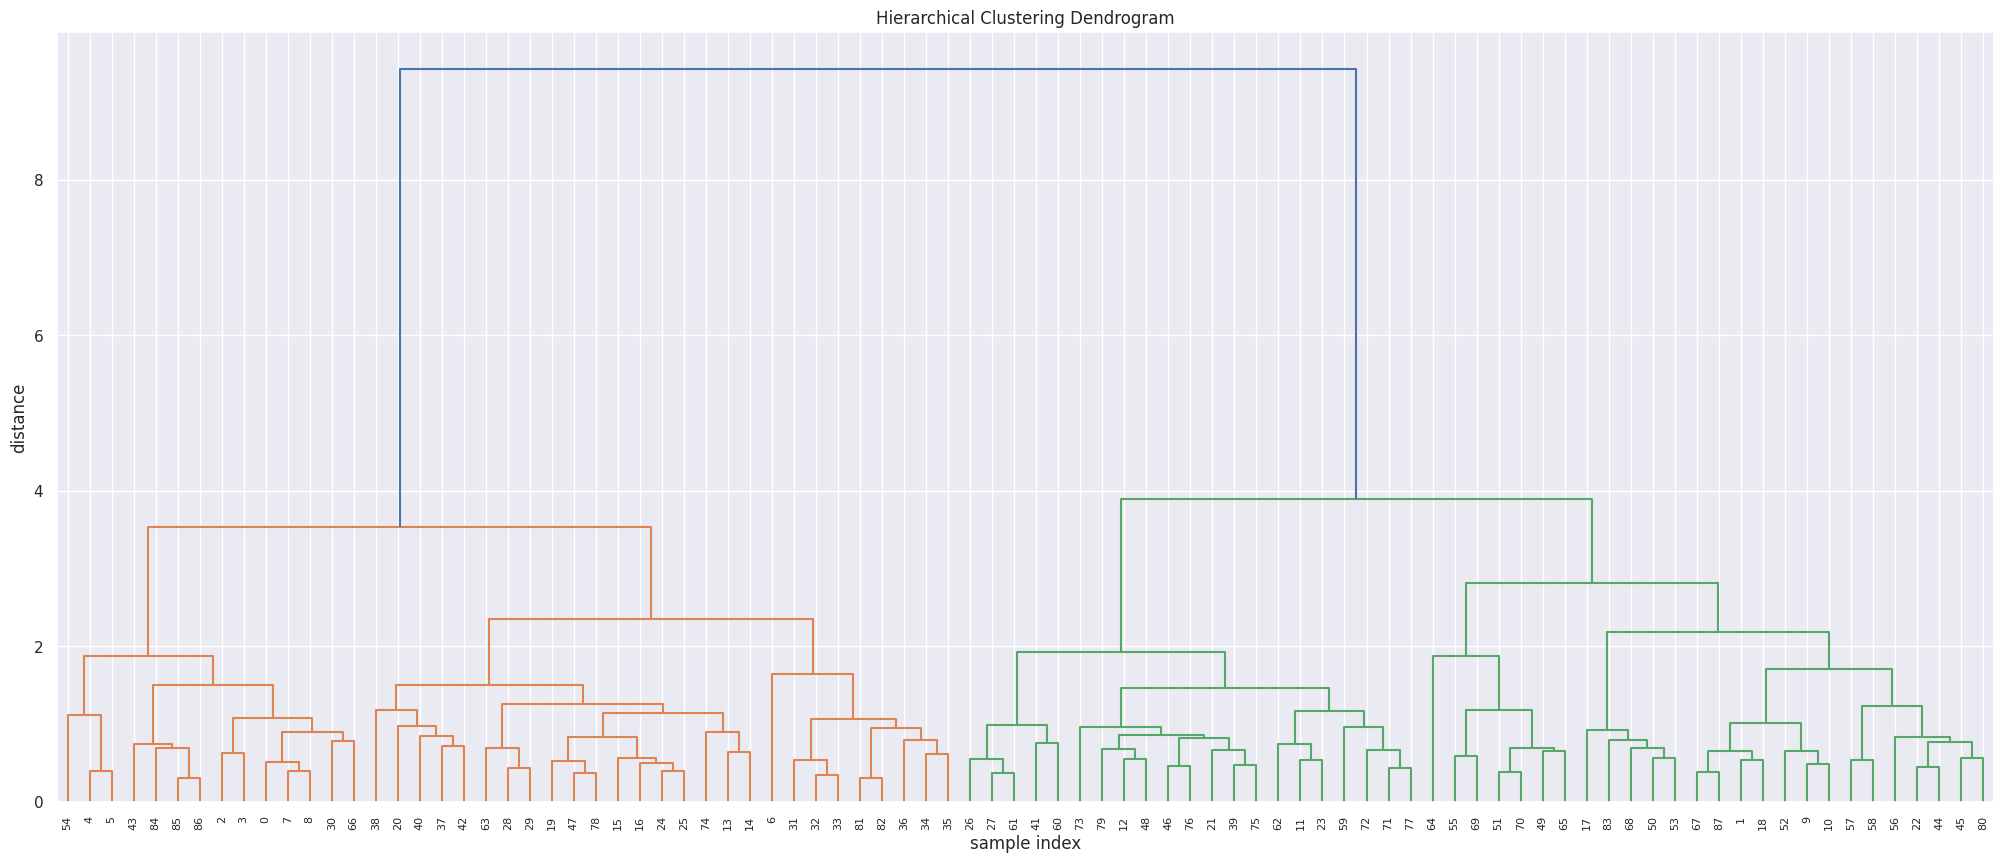

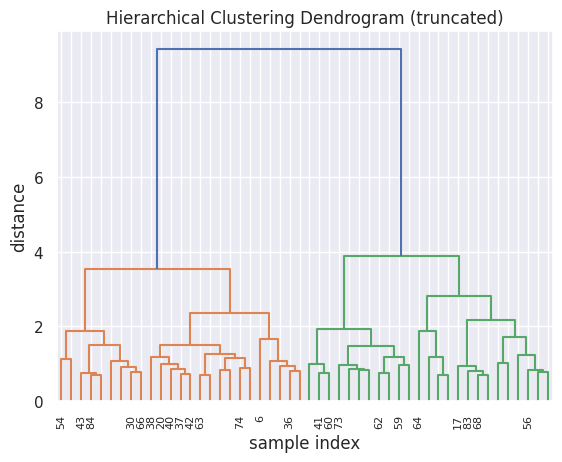

In [19]:
x=feature_vectors
# generate the linkage matrix
# Performs hierarchical/agglomerative clustering.
Z = linkage(x,method='ward',metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           )
plt.show()

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=50,  # show only the last p merged clusters
           show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=8.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           )
plt.show()

**Hierarchical Clustering with Heatmaps**

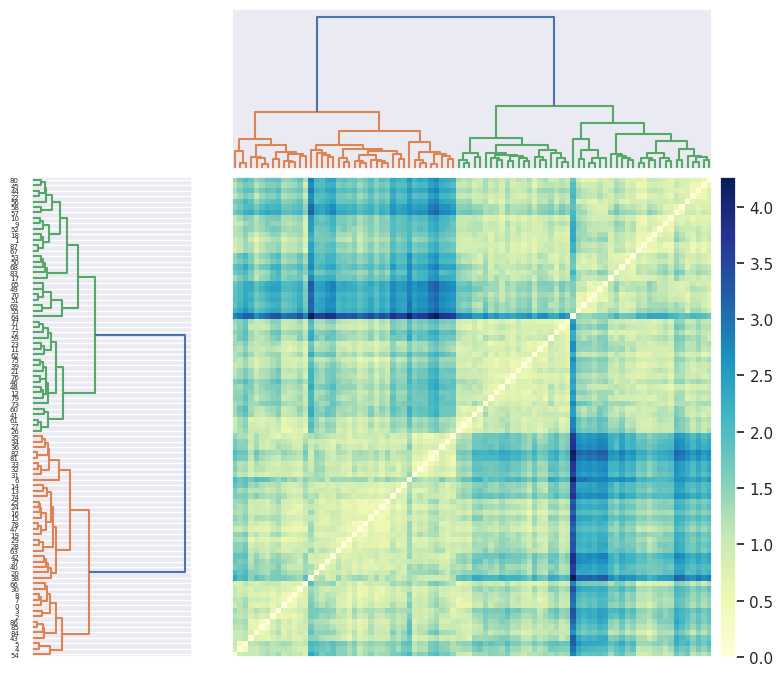

In [20]:
data_dist = pdist(x)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='ward')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()


**Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


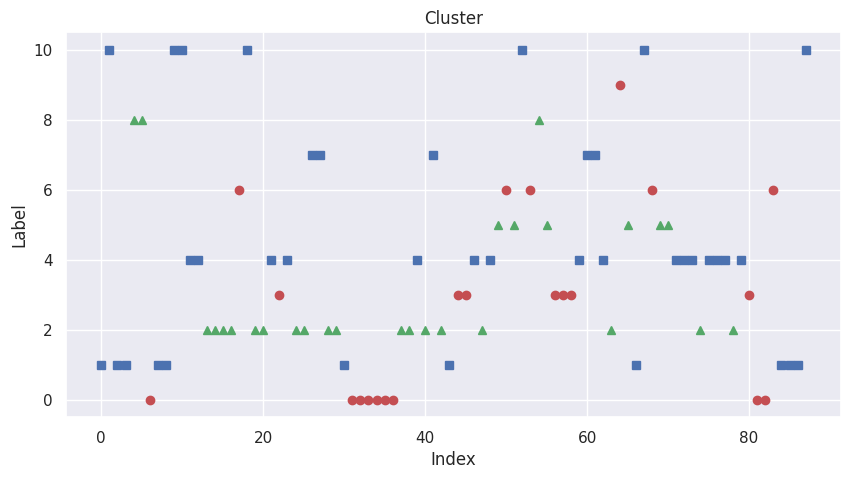

Cluster 0 =  9
Cluster 1 =  11
Cluster 2 =  18
Cluster 3 =  7
Cluster 4 =  16
Cluster 5 =  6
Cluster 6 =  5
Cluster 7 =  5
Cluster 8 =  3
Cluster 9 =  1
Cluster 10 =  7


In [21]:
cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')
clus=cluster.fit_predict(feature_vectors)
plt.figure(figsize=(10, 5))
cont0=0
cont1=0
cont2=0
cont3=0
cont4=0
cont5=0
cont6=0
cont7=0
cont8=0
cont9=0
cont10=0
for x in range(0, 88):
    if clus[x]==0:
        plt.plot(x,clus[x],'ro')
        cont0+=1
    elif clus[x]==1:
        plt.plot(x,clus[x],'bs')
        cont1+=1
    elif clus[x]==2:
        plt.plot(x,clus[x],'g^')
        cont2+=1
    elif clus[x]==3:
        plt.plot(x,clus[x],'ro')
        cont3+=1
    elif clus[x]==4:
        plt.plot(x,clus[x],'bs')
        cont4+=1
    elif clus[x]==5:
        plt.plot(x,clus[x],'g^')
        cont5+=1
    elif clus[x]==6:
        plt.plot(x,clus[x],'ro')
        cont6+=1
    elif clus[x]==7:
        plt.plot(x,clus[x],'bs')
        cont7+=1
    elif clus[x]==8:
        plt.plot(x,clus[x],'g^')
        cont8+=1
    elif clus[x]==9:
        plt.plot(x,clus[x],'ro')
        cont9+=1
    elif clus[x]==10:
        plt.plot(x,clus[x],'bs')
        cont10+=1

plt.title('Cluster')
plt.xlabel('Index')
plt.ylabel('Label')
plt.show()
print('Cluster 0 = ',cont0)
print('Cluster 1 = ',cont1)
print('Cluster 2 = ',cont2)
print('Cluster 3 = ',cont3)
print('Cluster 4 = ',cont4)
print('Cluster 5 = ',cont5)
print('Cluster 6 = ',cont6)
print('Cluster 7 = ',cont7)
print('Cluster 8 = ',cont8)
print('Cluster 9 = ',cont9)
print('Cluster 10 = ',cont10)

# **1.KNN Algorithm**

In [22]:
#Testing different quantities of neighbors
limit=70
x=[x for x in range(1,limit)]
yValidation=[0 for x in range(1,limit)]
ytrain=[0 for x in range(1,limit)]
yValidationScaler=[0 for x in range(1,limit)]
ytrainScaler=[0 for x in range(1,limit)]
yValidationPCA=[0 for x in range(1,limit)]
ytrainPCA=[0 for x in range(1,limit)]
yValidationPCAScaler=[0 for x in range(1,limit)]
ytrainPCAScaler=[0 for x in range(1,limit)]
for i in range(1,limit):
    KNN = KNeighborsClassifier(n_neighbors=i)

    KNN.fit(X_train, Y_train)
    trainScore=KNN.score(X_train,Y_train)
    validationScore=KNN.score(X_validation,Y_validation)

    KNN.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=KNN.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=KNN.score(X_validationScaler,Y_validationScaler)

    KNN.fit(X_trainPCA, Y_train)
    trainScorePCA=KNN.score(X_trainPCA,Y_train)
    validationScorePCA=KNN.score(X_validationPCA,Y_validation)

    KNN.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=KNN.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=KNN.score(X_validationPCAScaler,Y_validationScaler)

    print('KNN Score:',i)
    ytrain[i-1]=trainScore
    yValidation[i-1]=validationScore

    ytrainScaler[i-1]=trainScoreScaler
    yValidationScaler[i-1]=validationScoreScaler

    ytrainPCA[i-1]=trainScorePCA
    yValidationPCA[i-1]=validationScorePCA

    ytrainPCAScaler[i-1]=trainScorePCAScaler
    yValidationPCAScaler[i-1]=validationScorePCAScaler

KNN Score: 1
KNN Score: 2
KNN Score: 3
KNN Score: 4
KNN Score: 5
KNN Score: 6
KNN Score: 7
KNN Score: 8
KNN Score: 9
KNN Score: 10
KNN Score: 11
KNN Score: 12
KNN Score: 13
KNN Score: 14
KNN Score: 15
KNN Score: 16
KNN Score: 17
KNN Score: 18
KNN Score: 19
KNN Score: 20
KNN Score: 21
KNN Score: 22
KNN Score: 23
KNN Score: 24
KNN Score: 25
KNN Score: 26
KNN Score: 27
KNN Score: 28
KNN Score: 29
KNN Score: 30
KNN Score: 31
KNN Score: 32
KNN Score: 33
KNN Score: 34
KNN Score: 35
KNN Score: 36
KNN Score: 37
KNN Score: 38
KNN Score: 39
KNN Score: 40
KNN Score: 41
KNN Score: 42
KNN Score: 43
KNN Score: 44
KNN Score: 45
KNN Score: 46
KNN Score: 47
KNN Score: 48
KNN Score: 49
KNN Score: 50
KNN Score: 51
KNN Score: 52
KNN Score: 53
KNN Score: 54
KNN Score: 55
KNN Score: 56
KNN Score: 57
KNN Score: 58
KNN Score: 59
KNN Score: 60
KNN Score: 61
KNN Score: 62
KNN Score: 63
KNN Score: 64
KNN Score: 65
KNN Score: 66
KNN Score: 67
KNN Score: 68
KNN Score: 69


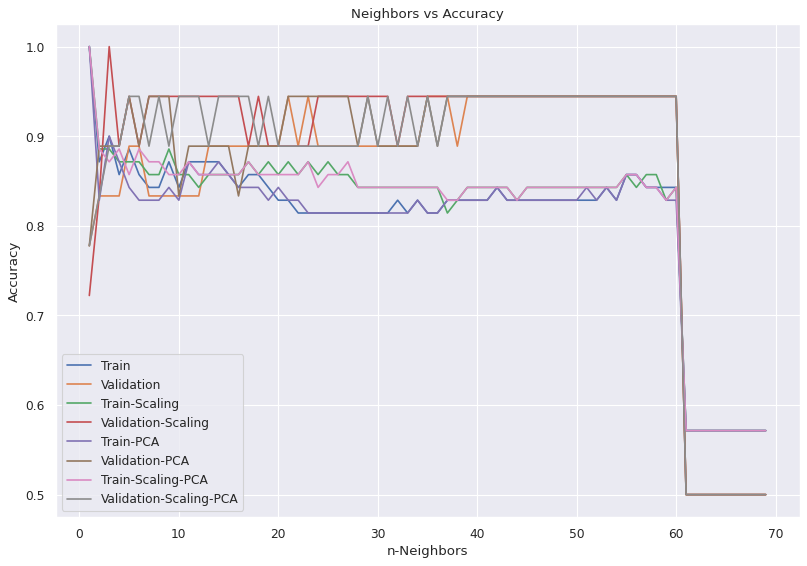

The best score with data validation:  0.9444444444444444 with Neighbors:  21
The best score with data validation with Scaling:  1.0 with Neighbors:  3
The best score with data validation with PCA:  0.9444444444444444 with Neighbors:  5
The best score with data validation with Scaling and PCA:  0.9444444444444444 with Neighbors:  5


In [23]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,label='Train')
plt.plot(x,yValidation,label='Validation')
plt.plot(x,ytrainScaler,label='Train-Scaling')
plt.plot(x,yValidationScaler,label='Validation-Scaling')
plt.plot(x,ytrainPCA,label='Train-PCA')
plt.plot(x,yValidationPCA,label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,label='Validation-Scaling-PCA')



plt.xlabel('n-Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')
plt.legend()
plt.savefig('KNN-Algorithm.png', dpi=100)
plt.show()
print('The best score with data validation: ', max(yValidation),'with Neighbors: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with Neighbors: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with Neighbors: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with Neighbors: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])


**# KNN Metrics**

Accuracy: 0.9444444444444444
F1 score: 0.9442724458204333
Recall: 0.9444444444444444
Precision: 0.9500000000000001

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18


 confusion matrix:
 [[8 1]
 [0 9]]


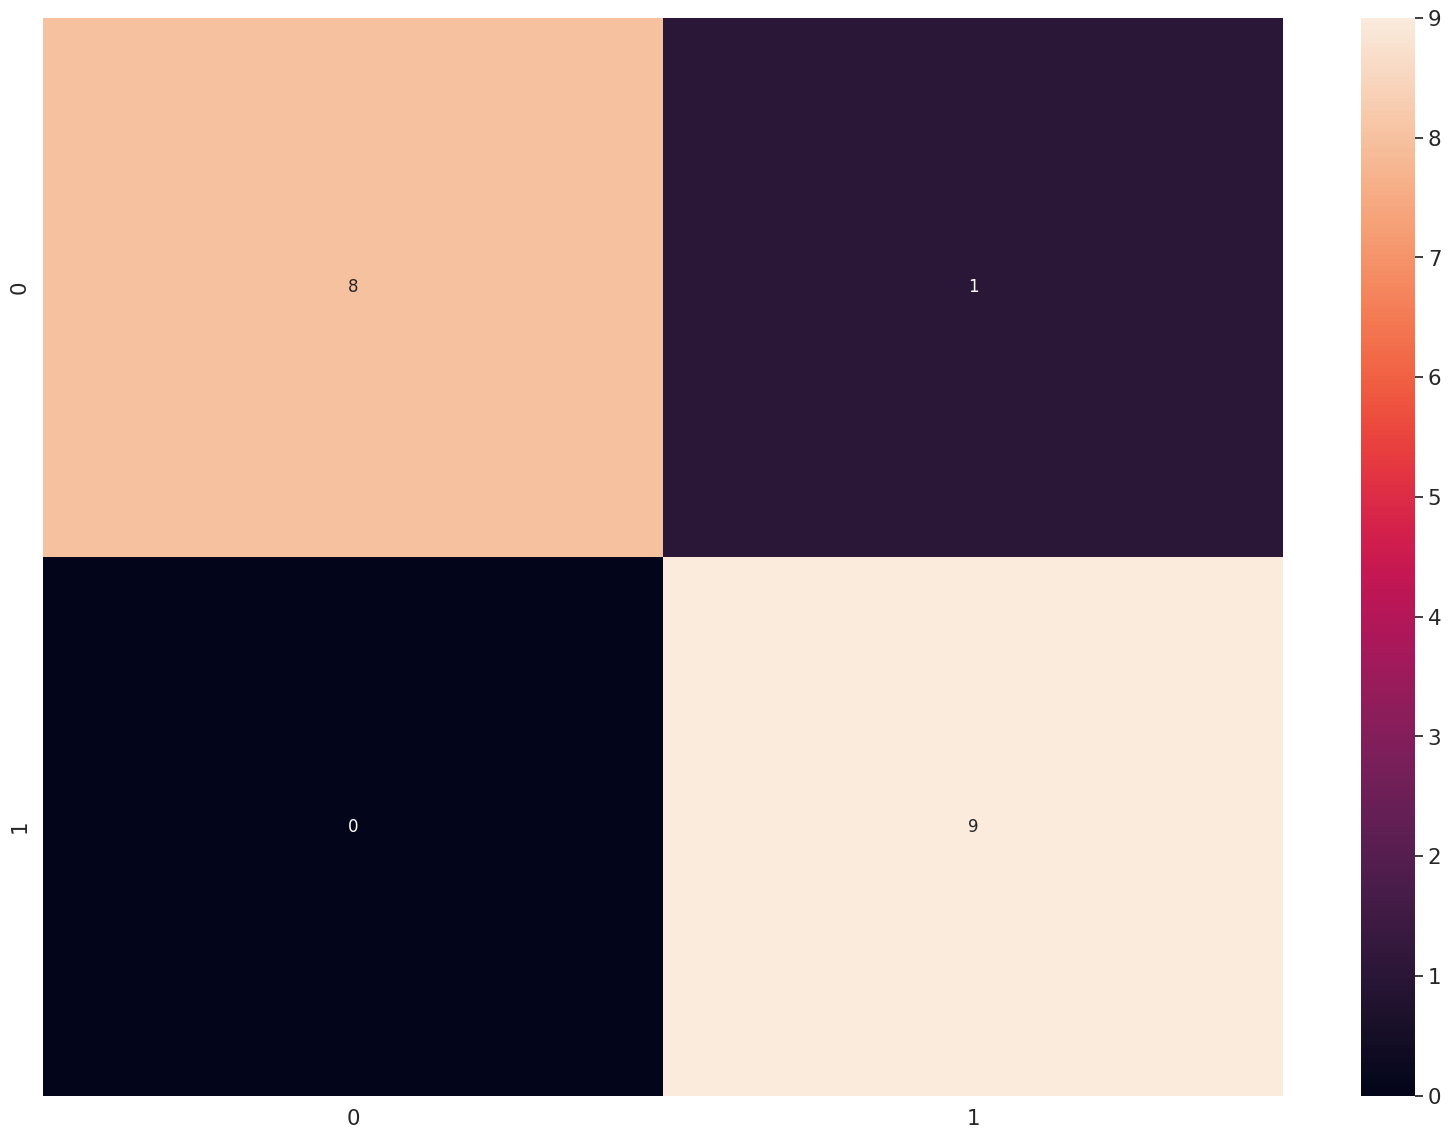

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=x[yValidation.index(max(yValidation))])
KNN.fit(X_trainPCA, Y_train)
predictions = KNN.predict(X_validationPCA)
metrics(Y_validation,predictions)

## **2.Linear Models**
***2.1 SVC ***

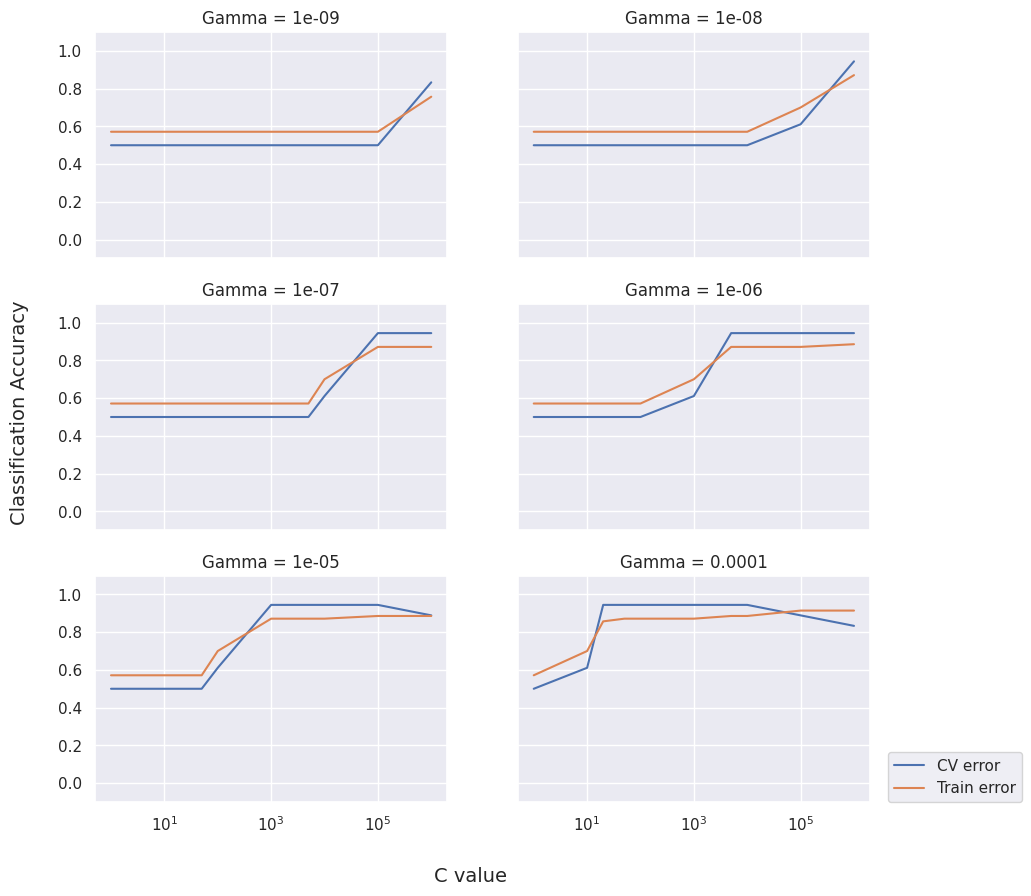

In [24]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

do_model_selection = True

if do_model_selection:
    C_range = np.array([ 1, 10, 20, 50, 100, 1000, 5000, 10000,100000,1000000])
    gamma_range = np.array([0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001])

    fig, axes = plt.subplots(3, 2,
                     sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):

            clf = SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_trainPCAScaler,Y_trainScaler)

            train_conf = confusion_matrix(Y_trainScaler, clf.predict(X_trainPCAScaler))
            cv_conf = confusion_matrix(Y_validationScaler, clf.predict(X_validationPCAScaler))

            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)

        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([-0.1,1.1])

    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)

    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

    plt.show()


In [39]:
#Testing different values of C
limit=400
step=10
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]

i=step
index=0
while i<limit:
    svc = SVC(C=i, gamma=1e-6)

    svc.fit(X_train, Y_train)
    trainScore=svc.score(X_train,Y_train)
    validationScore=svc.score(X_validation,Y_validation)

    svc.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=svc.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=svc.score(X_validationScaler,Y_validationScaler)

    svc.fit(X_trainPCA, Y_train)
    trainScorePCA=svc.score(X_trainPCA,Y_train)
    validationScorePCA=svc.score(X_validationPCA,Y_validation)

    svc.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=svc.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=svc.score(X_validationPCAScaler,Y_validationScaler)

    ytrain[index]=trainScore
    yValidation[index]=validationScore

    ytrainScaler[index]=trainScoreScaler
    yValidationScaler[index]=validationScoreScaler

    ytrainPCA[index]=trainScorePCA
    yValidationPCA[index]=validationScorePCA

    ytrainPCAScaler[index]=trainScorePCAScaler
    yValidationPCAScaler[index]=validationScorePCAScaler

    print('ite:',i)

    x[index]=i
    i+=step
    index+=1

ite: 10
ite: 20
ite: 30
ite: 40
ite: 50
ite: 60
ite: 70
ite: 80
ite: 90
ite: 100
ite: 110
ite: 120
ite: 130
ite: 140
ite: 150
ite: 160
ite: 170
ite: 180
ite: 190
ite: 200
ite: 210
ite: 220
ite: 230
ite: 240
ite: 250
ite: 260
ite: 270
ite: 280
ite: 290
ite: 300
ite: 310
ite: 320
ite: 330
ite: 340
ite: 350
ite: 360
ite: 370
ite: 380
ite: 390


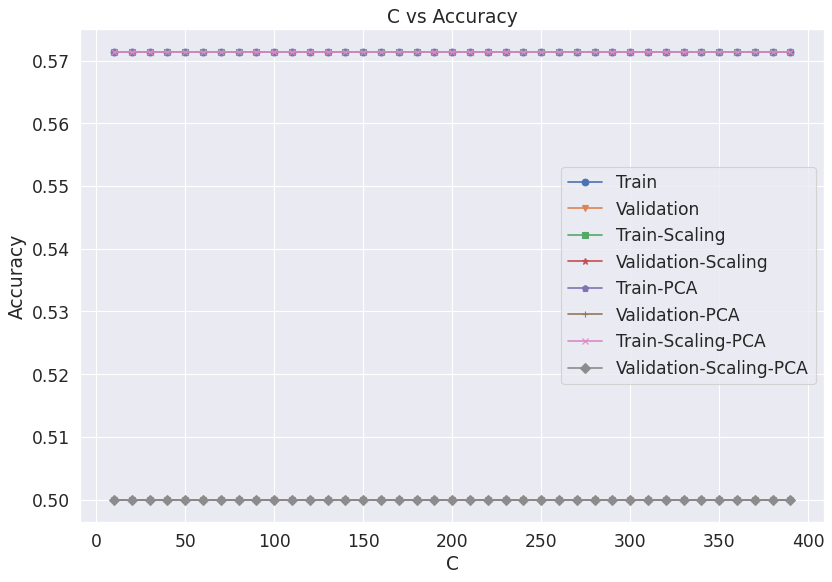

The best score with data validation:  0.5 with C:  10
The best score with data validation with Scaling:  0.5 with C:  10
The best score with data validation with PCA:  0.5 with C:  10
The best score with data validation with Scaling and PCA:  0.5 with C:  10


In [40]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')
plt.legend()
plt.savefig('SVC-Algorithm.png', dpi=100)
plt.show()
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])


# **SVC Metrics**

Accuracy: 0.5
F1 score: 0.3333333333333333
Recall: 0.5
Precision: 0.25

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.50      1.00      0.67         9

    accuracy                           0.50        18
   macro avg       0.25      0.50      0.33        18
weighted avg       0.25      0.50      0.33        18


 confusion matrix:
 [[0 9]
 [0 9]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

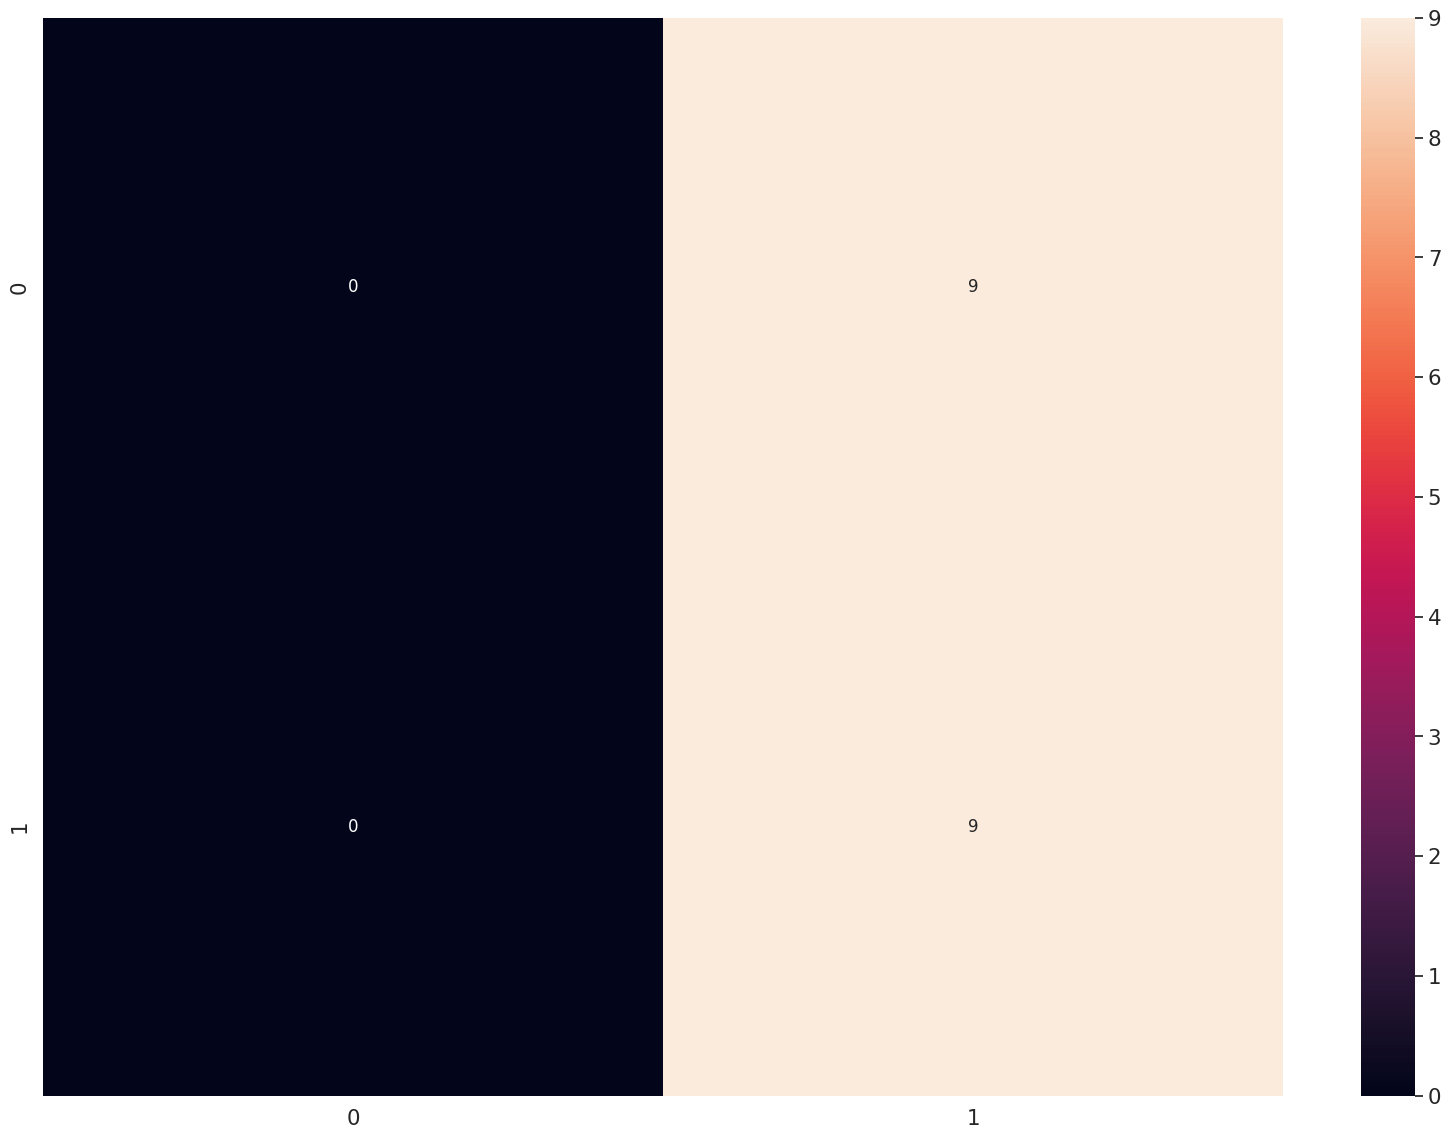

In [41]:
svc = SVC(C=x[yValidationScaler.index(max(yValidationScaler))],gamma=1e-6)
svc.fit(X_trainScaler, Y_trainScaler)
predictions = svc.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

# **2.2 LR Algorithm**

In [42]:
#Testing different values of C
limit=1
step=0.1
x=[0 for x in range(0,int(limit/step))]
yValidation=[0 for x in range(0,int(limit/step))]
ytrain=[0 for x in range(0,int(limit/step))]
yValidationScaler=[0 for x in range(0,int(limit/step))]
ytrainScaler=[0 for x in range(0,int(limit/step))]
yValidationPCA=[0 for x in range(0,int(limit/step))]
ytrainPCA=[0 for x in range(0,int(limit/step))]
yValidationPCAScaler=[0 for x in range(0,int(limit/step))]
ytrainPCAScaler=[0 for x in range(0,int(limit/step))]
i=step
index=0
while i<limit:
    lr = LogisticRegression(C=i)

    lr.fit(X_train, Y_train)
    trainScore=lr.score(X_train,Y_train)
    validationScore=lr.score(X_validation,Y_validation)

    lr.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=lr.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=lr.score(X_validationScaler,Y_validationScaler)

    lr.fit(X_trainPCA, Y_train)
    trainScorePCA=lr.score(X_trainPCA,Y_train)
    validationScorePCA=lr.score(X_validationPCA,Y_validation)

    lr.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=lr.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=lr.score(X_validationPCAScaler,Y_validationScaler)

    ytrain[index]=trainScore
    yValidation[index]=validationScore

    ytrainScaler[index]=trainScoreScaler
    yValidationScaler[index]=validationScoreScaler

    ytrainPCA[index]=trainScorePCA
    yValidationPCA[index]=validationScorePCA

    ytrainPCAScaler[index]=trainScorePCAScaler
    yValidationPCAScaler[index]=validationScorePCAScaler

    print('ite:',i)

    x[index]=i
    i+=step
    index+=1

ite: 0.1
ite: 0.2
ite: 0.30000000000000004
ite: 0.4
ite: 0.5
ite: 0.6
ite: 0.7
ite: 0.7999999999999999
ite: 0.8999999999999999
ite: 0.9999999999999999


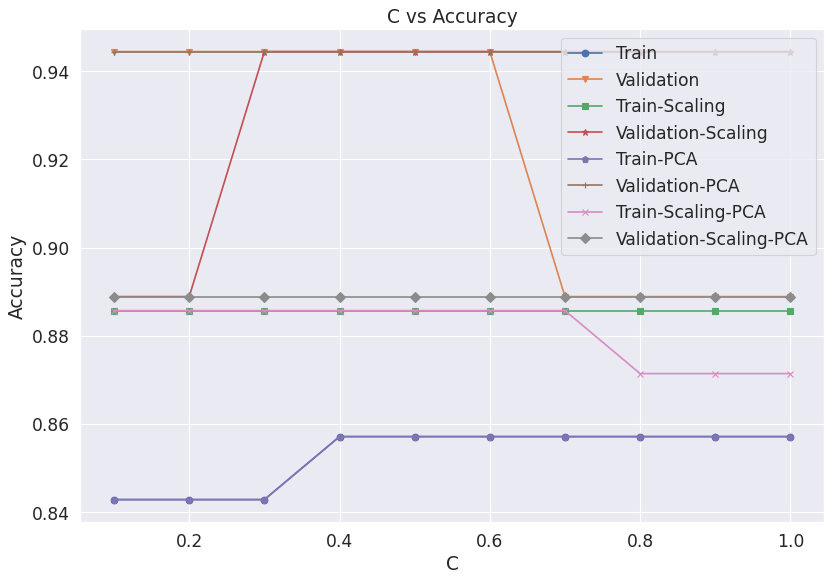

The best score with data validation:  0.9444444444444444 with C:  0.1
The best score with data validation with Scaling:  0.9444444444444444 with C:  0.30000000000000004
The best score with data validation with PCA:  0.9444444444444444 with C:  0.1
The best score with data validation with Scaling and PCA:  0.8888888888888888 with C:  0.1


In [43]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')
plt.legend()
plt.savefig('LR-Algorithm.png', dpi=100)
plt.show()
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])


# **LR Metrics**

Accuracy: 0.9444444444444444
F1 score: 0.9442724458204333
Recall: 0.9444444444444444
Precision: 0.9500000000000001

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18


 confusion matrix:
 [[8 1]
 [0 9]]


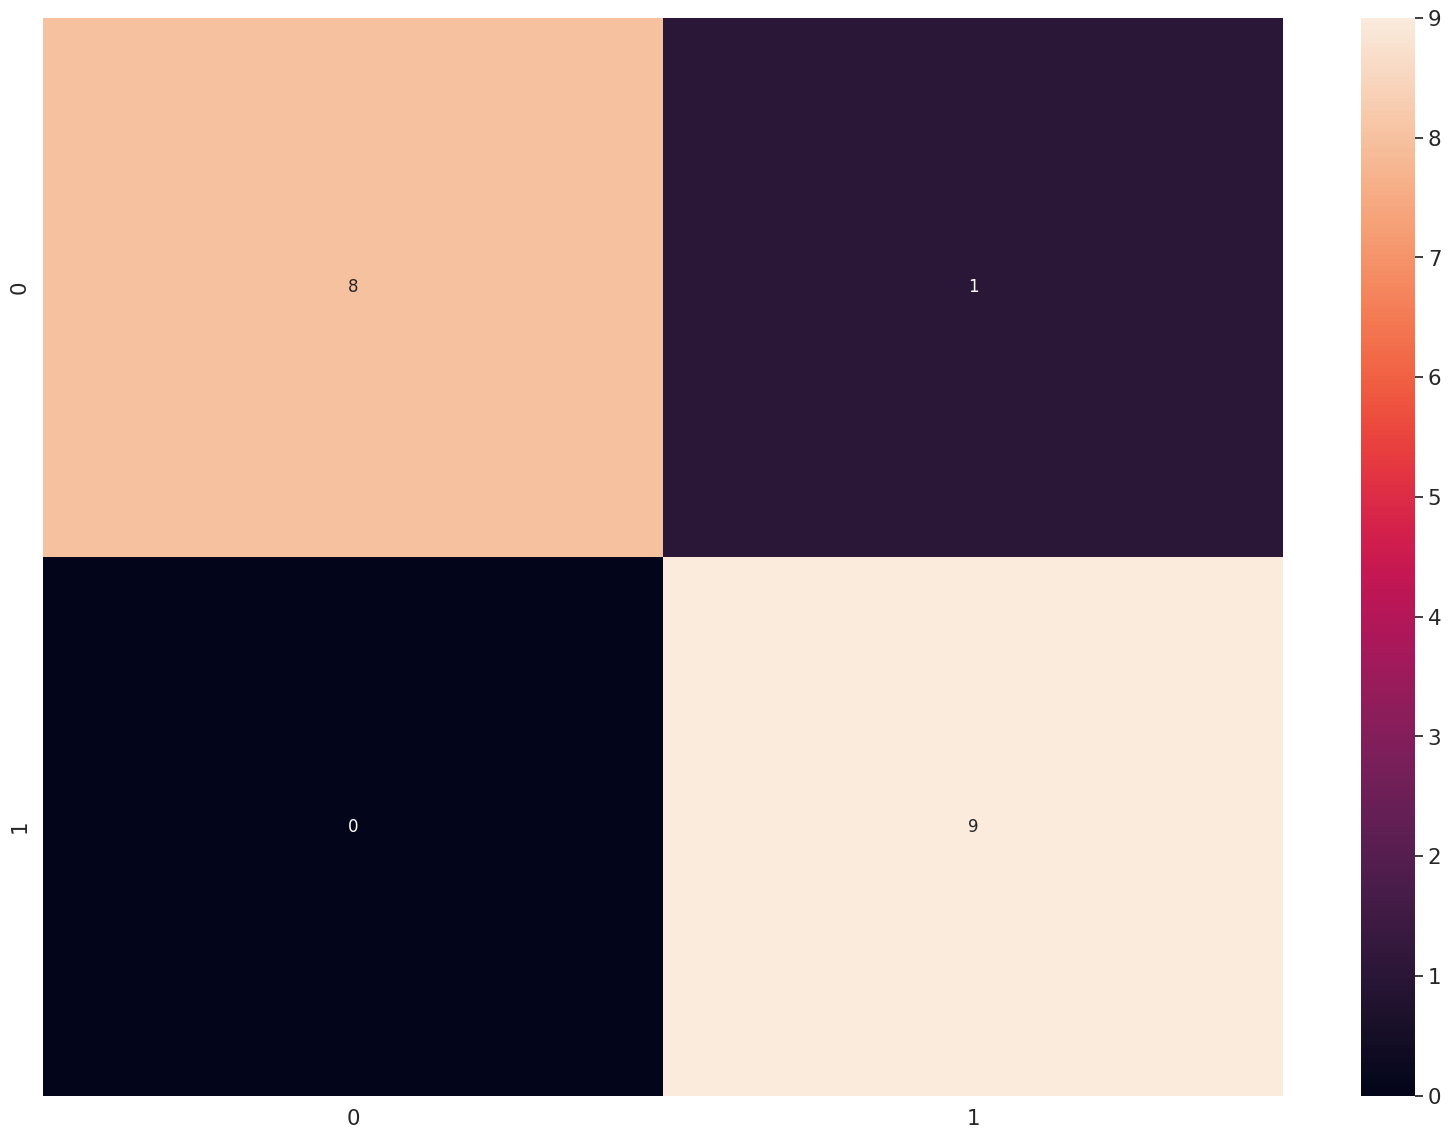

In [44]:
lr = LogisticRegression(C=x[yValidation.index(max(yValidation))])
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
metrics(Y_validation,predictions)

## **2.3 Ridge Regression**

In [45]:
#Testing different values of alpha
limit=1
step=0.05
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, Y_train)
    trainScore=ridge.score(X_train,Y_train)
    validationScore=ridge.score(X_validation,Y_validation)

    ridge.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=ridge.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=ridge.score(X_validationScaler,Y_validationScaler)

    ridge.fit(X_trainPCA, Y_train)
    trainScorePCA=ridge.score(X_trainPCA,Y_train)
    validationScorePCA=ridge.score(X_validationPCA,Y_validation)

    ridge.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=ridge.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=ridge.score(X_validationPCAScaler,Y_validationScaler)

    ytrain[index]=trainScore
    yValidation[index]=validationScore

    ytrainScaler[index]=trainScoreScaler
    yValidationScaler[index]=validationScoreScaler

    ytrainPCA[index]=trainScorePCA
    yValidationPCA[index]=validationScorePCA

    ytrainPCAScaler[index]=trainScorePCAScaler
    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1

it: 0.05
it: 0.1
it: 0.15000000000000002
it: 0.2
it: 0.25
it: 0.3
it: 0.35
it: 0.39999999999999997
it: 0.44999999999999996
it: 0.49999999999999994
it: 0.5499999999999999
it: 0.6
it: 0.65
it: 0.7000000000000001
it: 0.7500000000000001
it: 0.8000000000000002
it: 0.8500000000000002
it: 0.9000000000000002
it: 0.9500000000000003


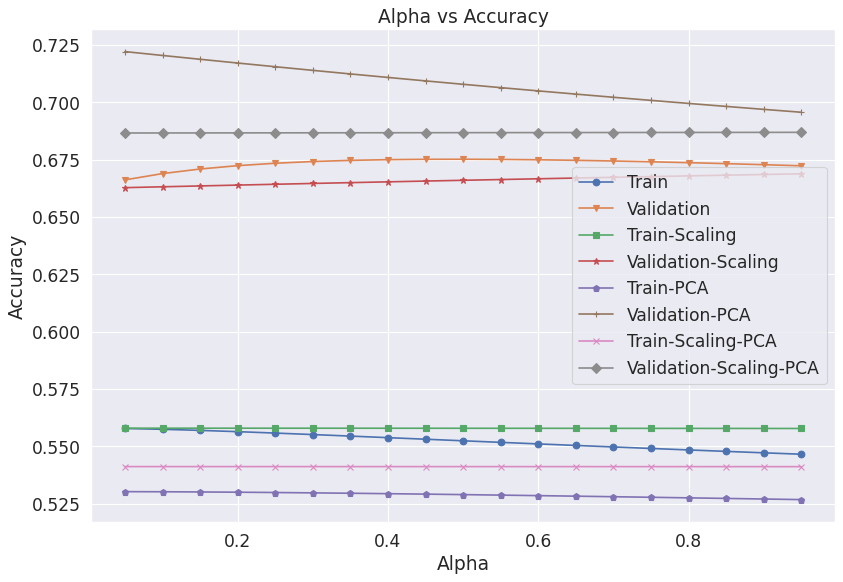

The best score with data validation:  0.6751127425853772 with C:  0.49999999999999994
The best score with data validation with Scaling:  0.6687657823438704 with C:  0.9500000000000003
The best score with data validation with PCA:  0.7220150800923677 with C:  0.05
The best score with data validation with Scaling and PCA:  0.6868334041985311 with C:  0.9500000000000003


In [46]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Alpha vs Accuracy')
plt.legend()
plt.savefig('Ridge-Algorithm.png', dpi=100)
plt.show()
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])


# **2.4 Lasso Regression**

In [47]:
#Testing different values of alpha
limit=4
step=0.1
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    lasso = Lasso(alpha=i, max_iter=10000)
    lasso.fit(X_train, Y_train)
    trainScore=lasso.score(X_train,Y_train)
    validationScore=lasso.score(X_validation,Y_validation)

    lasso.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=lasso.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=lasso.score(X_validationScaler,Y_validationScaler)

    lasso.fit(X_trainPCA, Y_train)
    trainScorePCA=lasso.score(X_trainPCA,Y_train)
    validationScorePCA=lasso.score(X_validationPCA,Y_validation)

    lasso.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=lasso.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=lasso.score(X_validationPCAScaler,Y_validationScaler)

    ytrain[index]=trainScore
    yValidation[index]=validationScore

    ytrainScaler[index]=trainScoreScaler
    yValidationScaler[index]=validationScoreScaler

    ytrainPCA[index]=trainScorePCA
    yValidationPCA[index]=validationScorePCA

    ytrainPCAScaler[index]=trainScorePCAScaler
    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1

it: 0.1
it: 0.2
it: 0.30000000000000004
it: 0.4
it: 0.5
it: 0.6
it: 0.7
it: 0.7999999999999999
it: 0.8999999999999999
it: 0.9999999999999999
it: 1.0999999999999999
it: 1.2
it: 1.3
it: 1.4000000000000001
it: 1.5000000000000002
it: 1.6000000000000003
it: 1.7000000000000004
it: 1.8000000000000005
it: 1.9000000000000006
it: 2.0000000000000004
it: 2.1000000000000005
it: 2.2000000000000006
it: 2.3000000000000007
it: 2.400000000000001
it: 2.500000000000001
it: 2.600000000000001
it: 2.700000000000001
it: 2.800000000000001
it: 2.9000000000000012
it: 3.0000000000000013
it: 3.1000000000000014
it: 3.2000000000000015
it: 3.3000000000000016
it: 3.4000000000000017
it: 3.5000000000000018
it: 3.600000000000002
it: 3.700000000000002
it: 3.800000000000002
it: 3.900000000000002


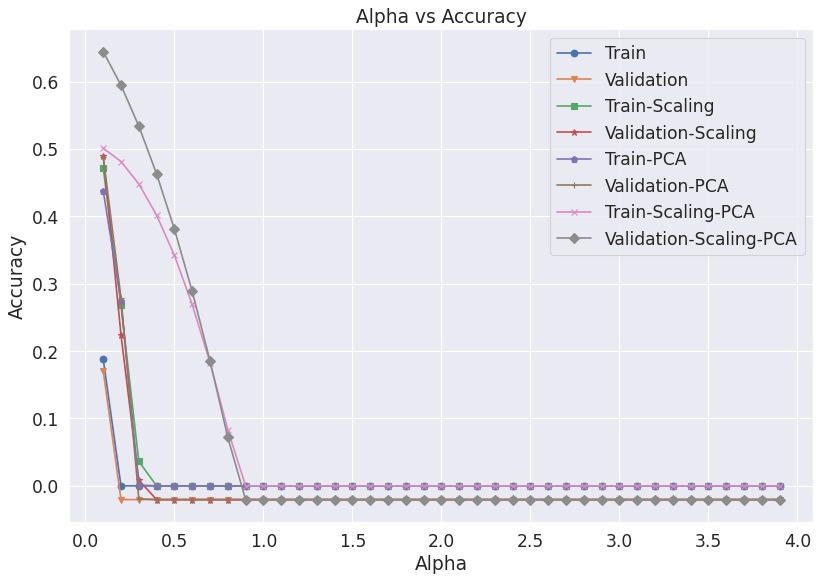

The best score with data validation:  0.17101867739845944 with C:  0.1
The best score with data validation with Scaling:  0.49021997370196424 with C:  0.1
The best score with data validation with PCA:  0.4887003112751136 with C:  0.1
The best score with data validation with Scaling and PCA:  0.644410133565113 with C:  0.1


In [48]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Alpha vs Accuracy')
plt.legend()
plt.savefig('Lasso-Algorithm.png', dpi=100)
plt.show()
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])


# **3. LDA Algorithm**

Accuracy: 0.9444444444444444
F1 score: 0.9442724458204333
Recall: 0.9444444444444444
Precision: 0.9500000000000001

 clasification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18


 confusion matrix:
 [[9 0]
 [1 8]]


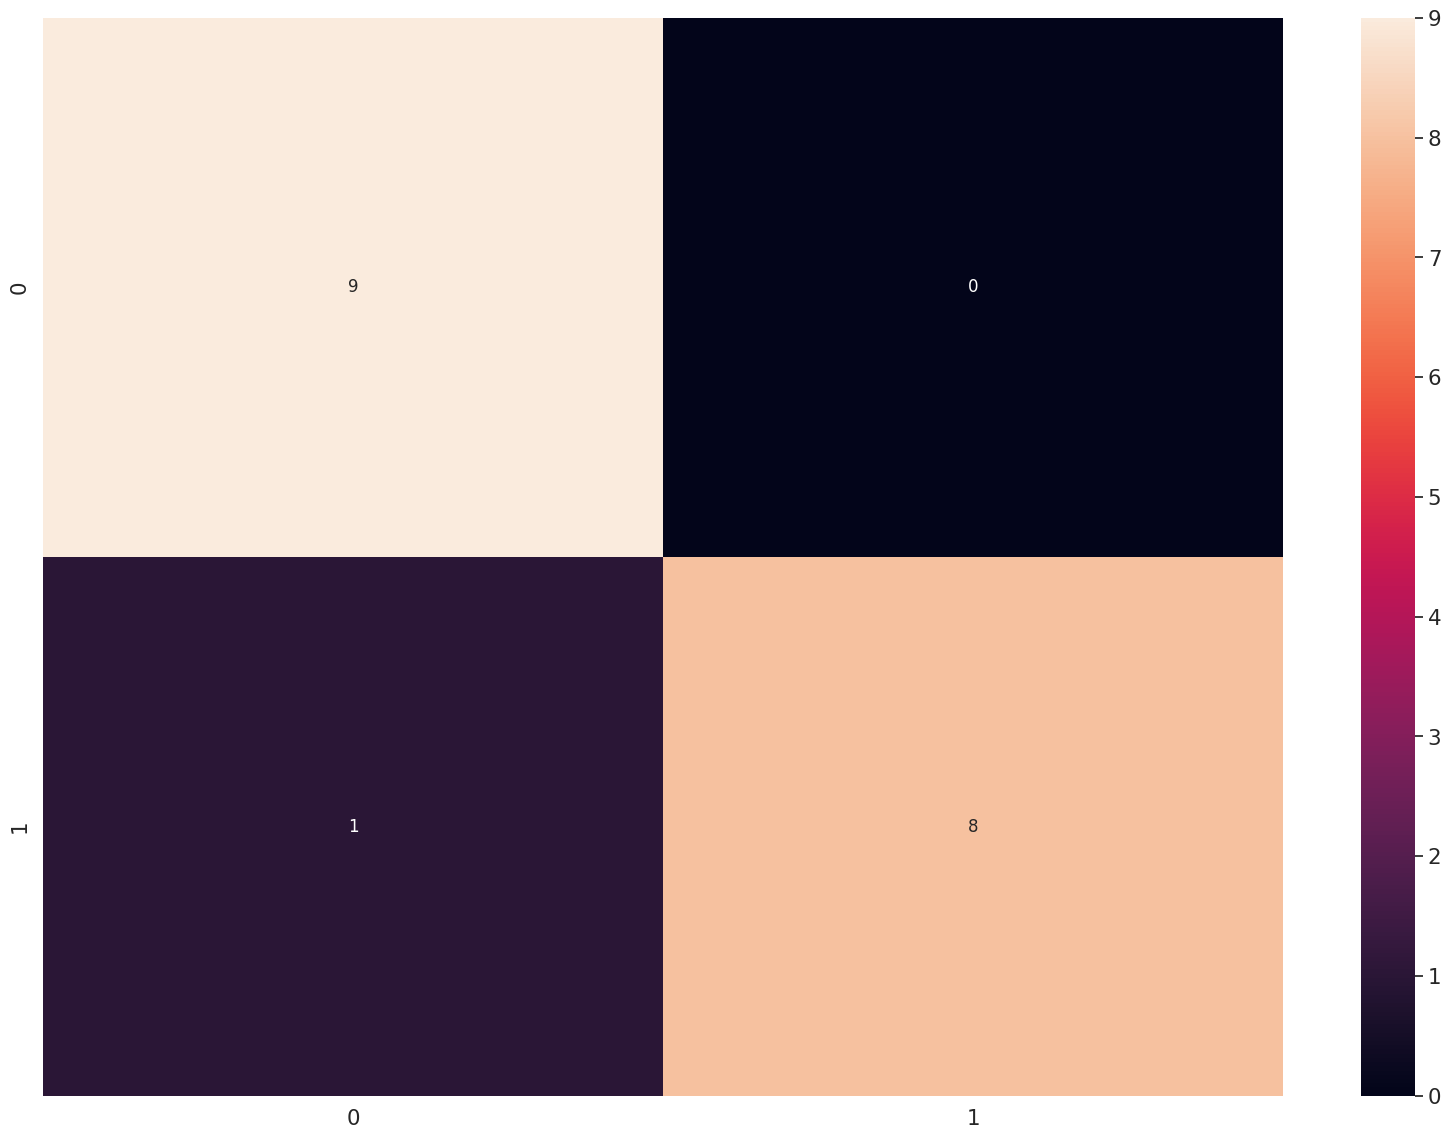

Accuracy: 0.9444444444444444
F1 score: 0.9442724458204333
Recall: 0.9444444444444444
Precision: 0.9500000000000001

 clasification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18


 confusion matrix:
 [[9 0]
 [1 8]]


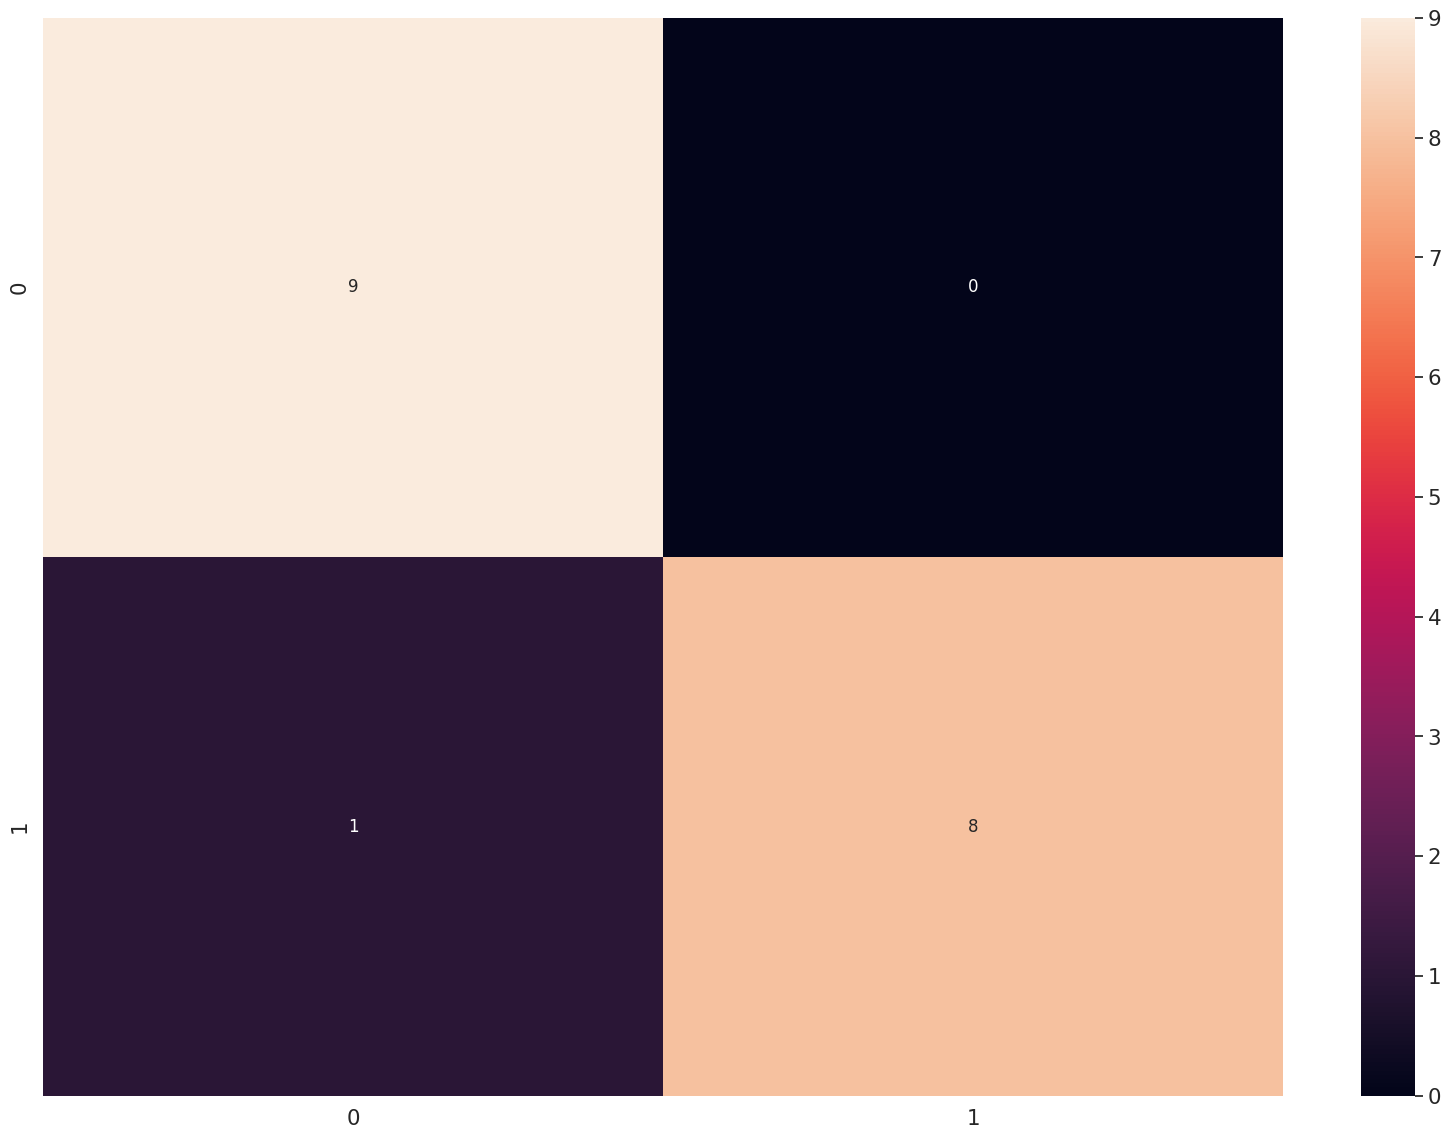

Accuracy: 0.9444444444444444
F1 score: 0.9442724458204333
Recall: 0.9444444444444444
Precision: 0.9500000000000001

 clasification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18


 confusion matrix:
 [[9 0]
 [1 8]]


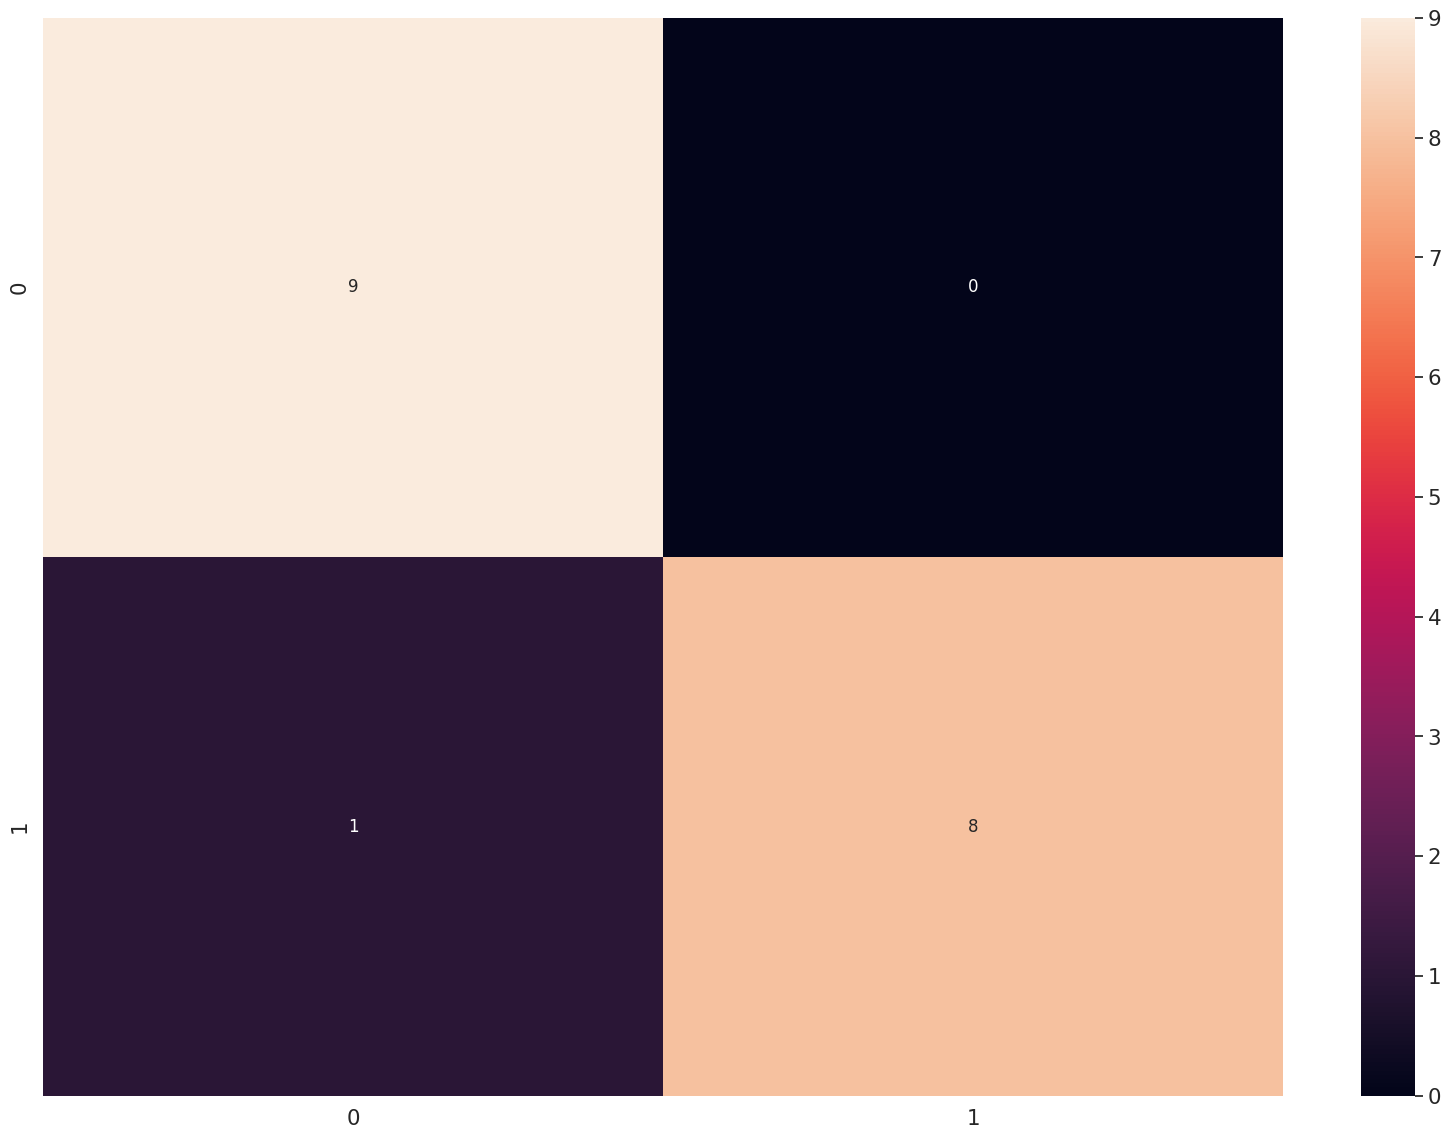

Accuracy: 0.8888888888888888
F1 score: 0.8888888888888888
Recall: 0.8888888888888888
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18


 confusion matrix:
 [[8 1]
 [1 8]]


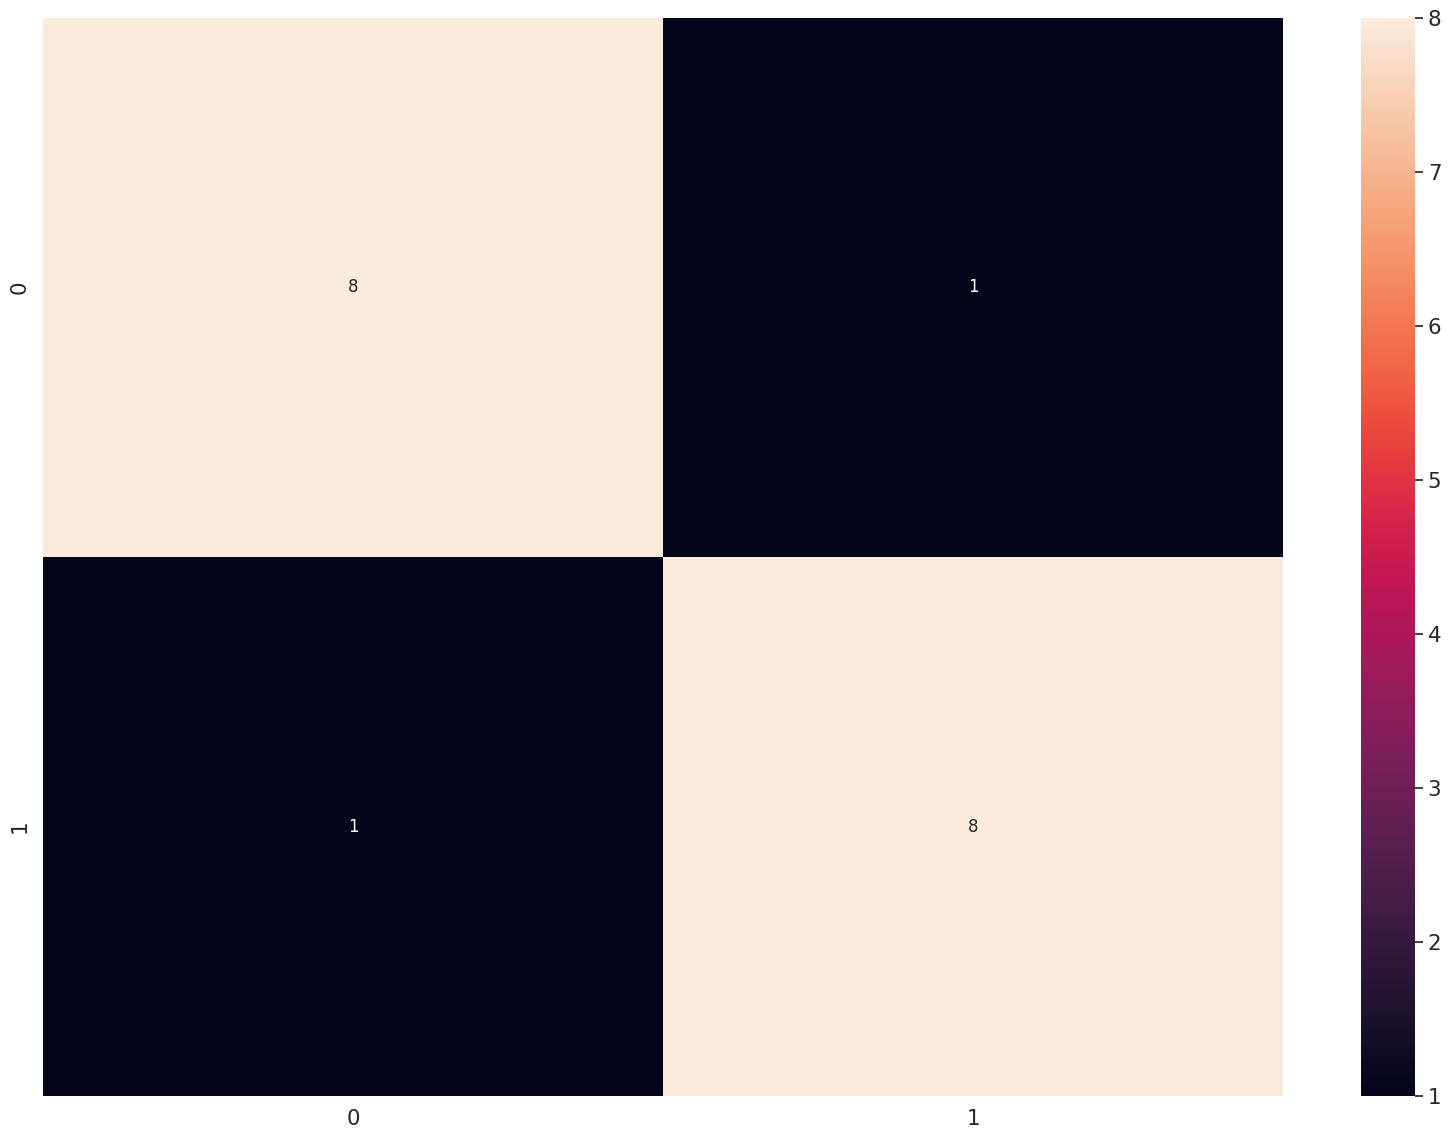

In [49]:
LDA = LinearDiscriminantAnalysis( solver = 'svd')

LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
metrics(Y_validation,predictions)

LDA.fit(X_trainScaler, Y_trainScaler)
predictions = LDA.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

LDA.fit(X_trainPCA, Y_train)
predictions = LDA.predict(X_validationPCA)
metrics(Y_validation,predictions)

LDA.fit(X_trainPCAScaler, Y_trainScaler)
predictions = LDA.predict(X_validationPCAScaler)
metrics(Y_validationScaler,predictions)

# **4.Naive Bayes Algorithm**

Accuracy: 0.9444444444444444
F1 score: 0.9442724458204333
Recall: 0.9444444444444444
Precision: 0.9500000000000001

 clasification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18


 confusion matrix:
 [[9 0]
 [1 8]]


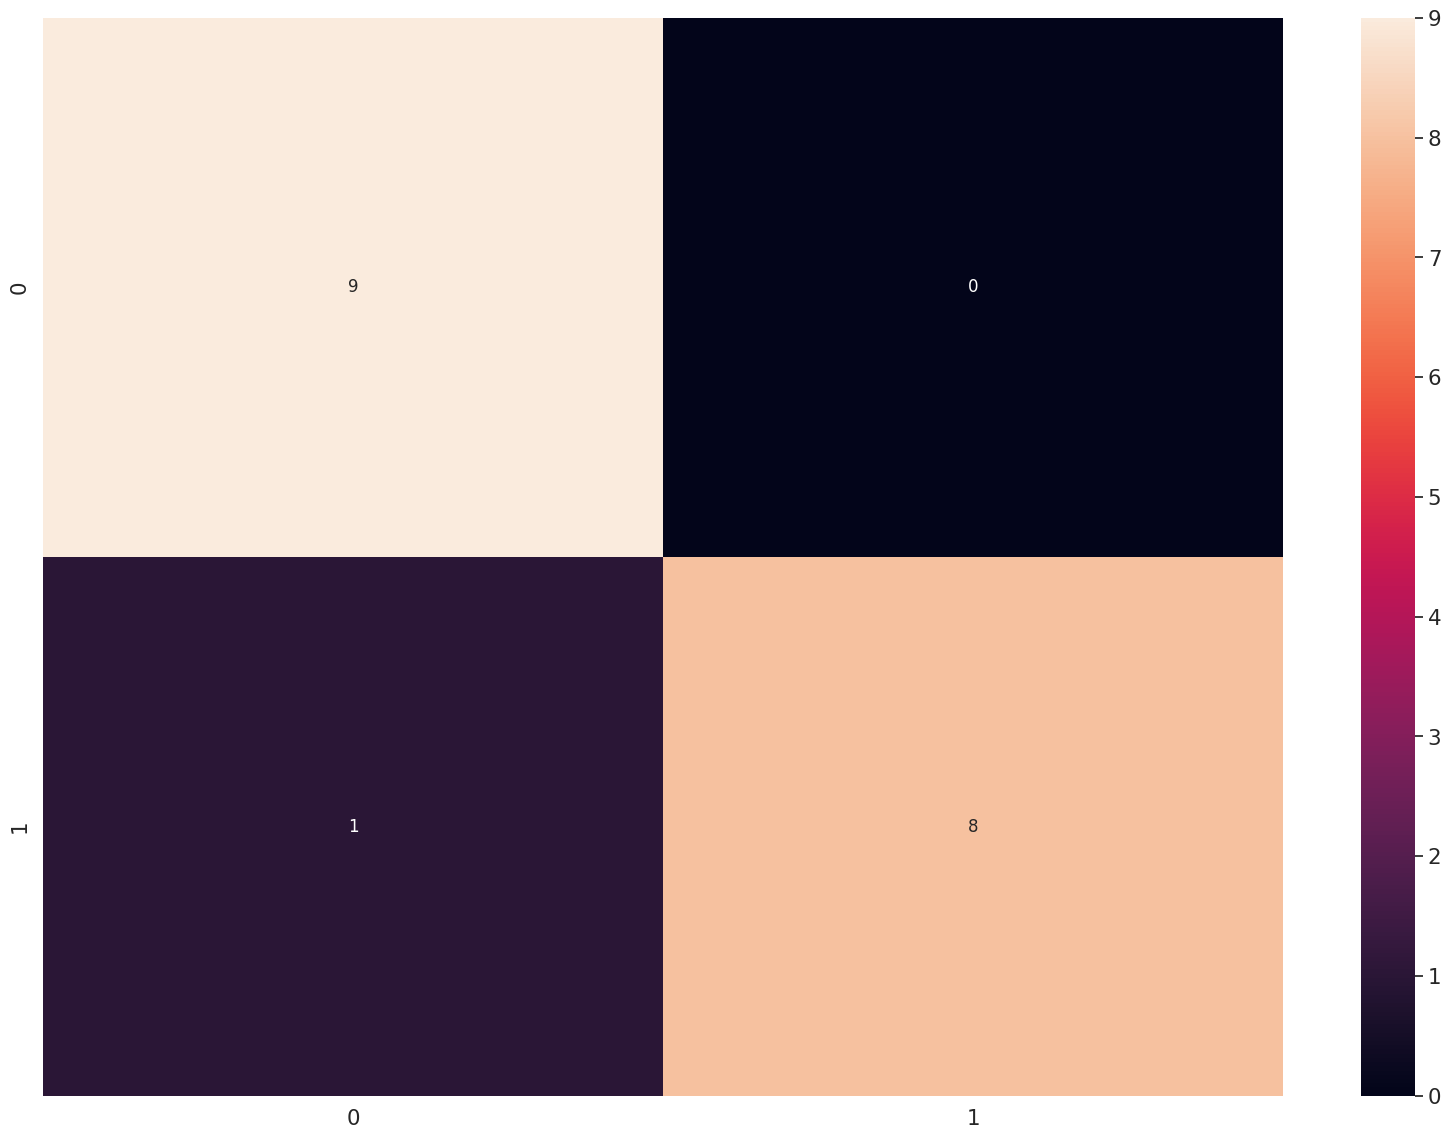

Accuracy: 0.9444444444444444
F1 score: 0.9442724458204333
Recall: 0.9444444444444444
Precision: 0.9500000000000001

 clasification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18


 confusion matrix:
 [[9 0]
 [1 8]]


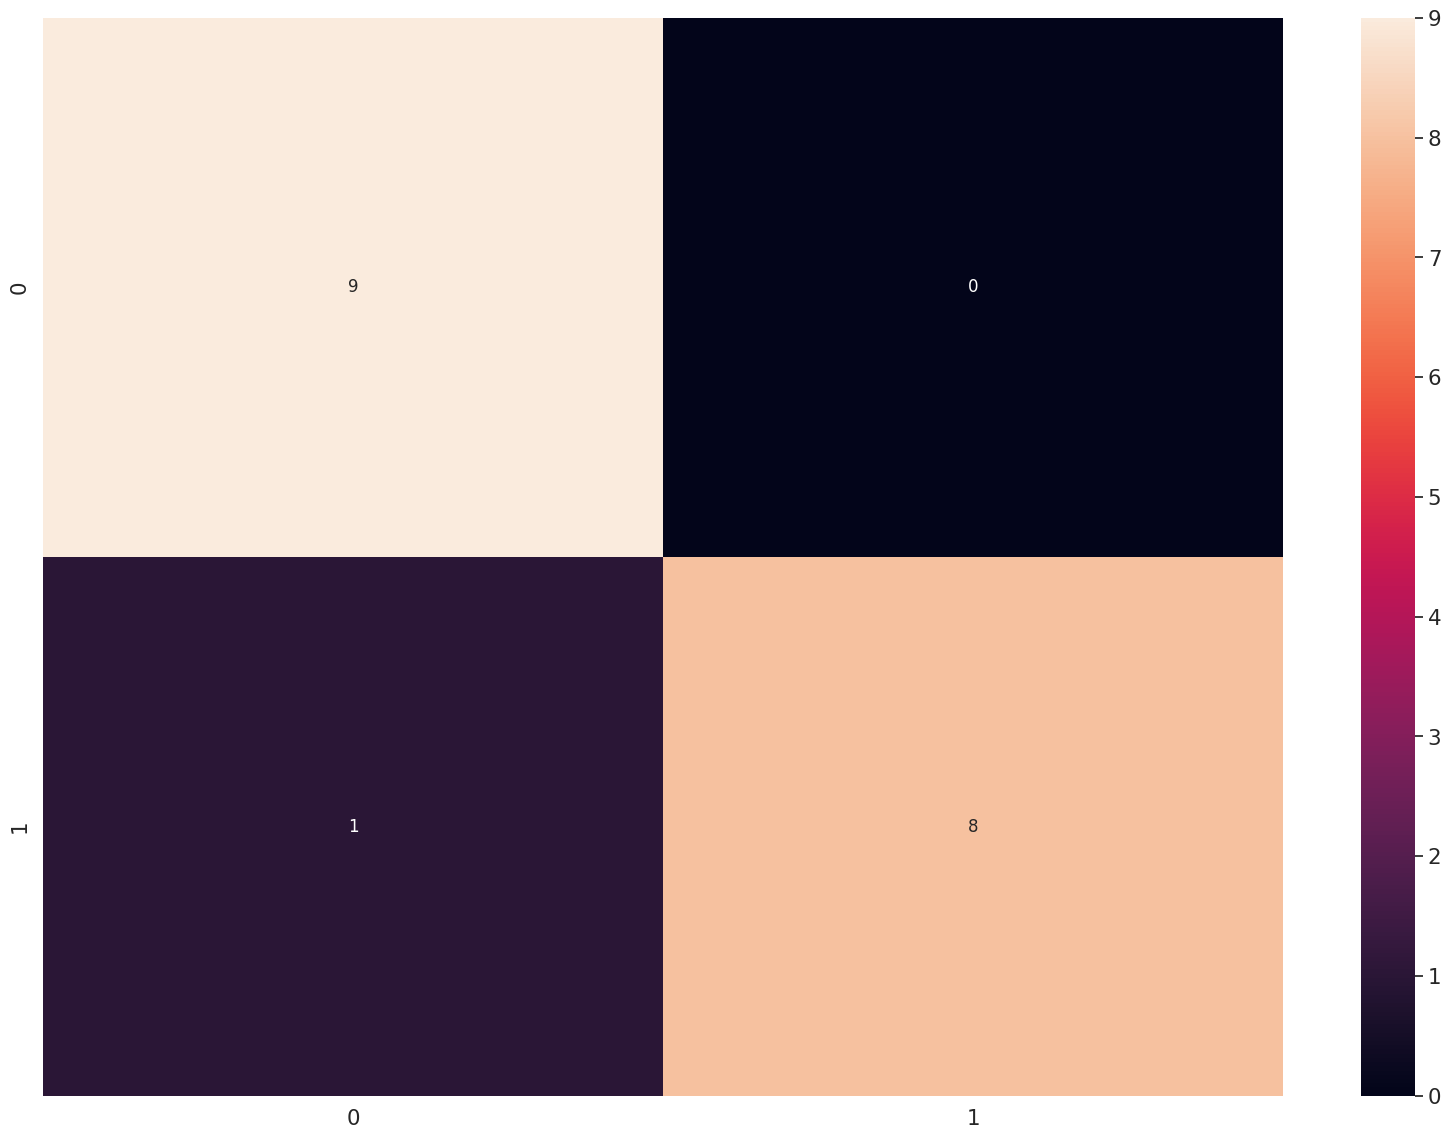

Accuracy: 0.8888888888888888
F1 score: 0.8888888888888888
Recall: 0.8888888888888888
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18


 confusion matrix:
 [[8 1]
 [1 8]]


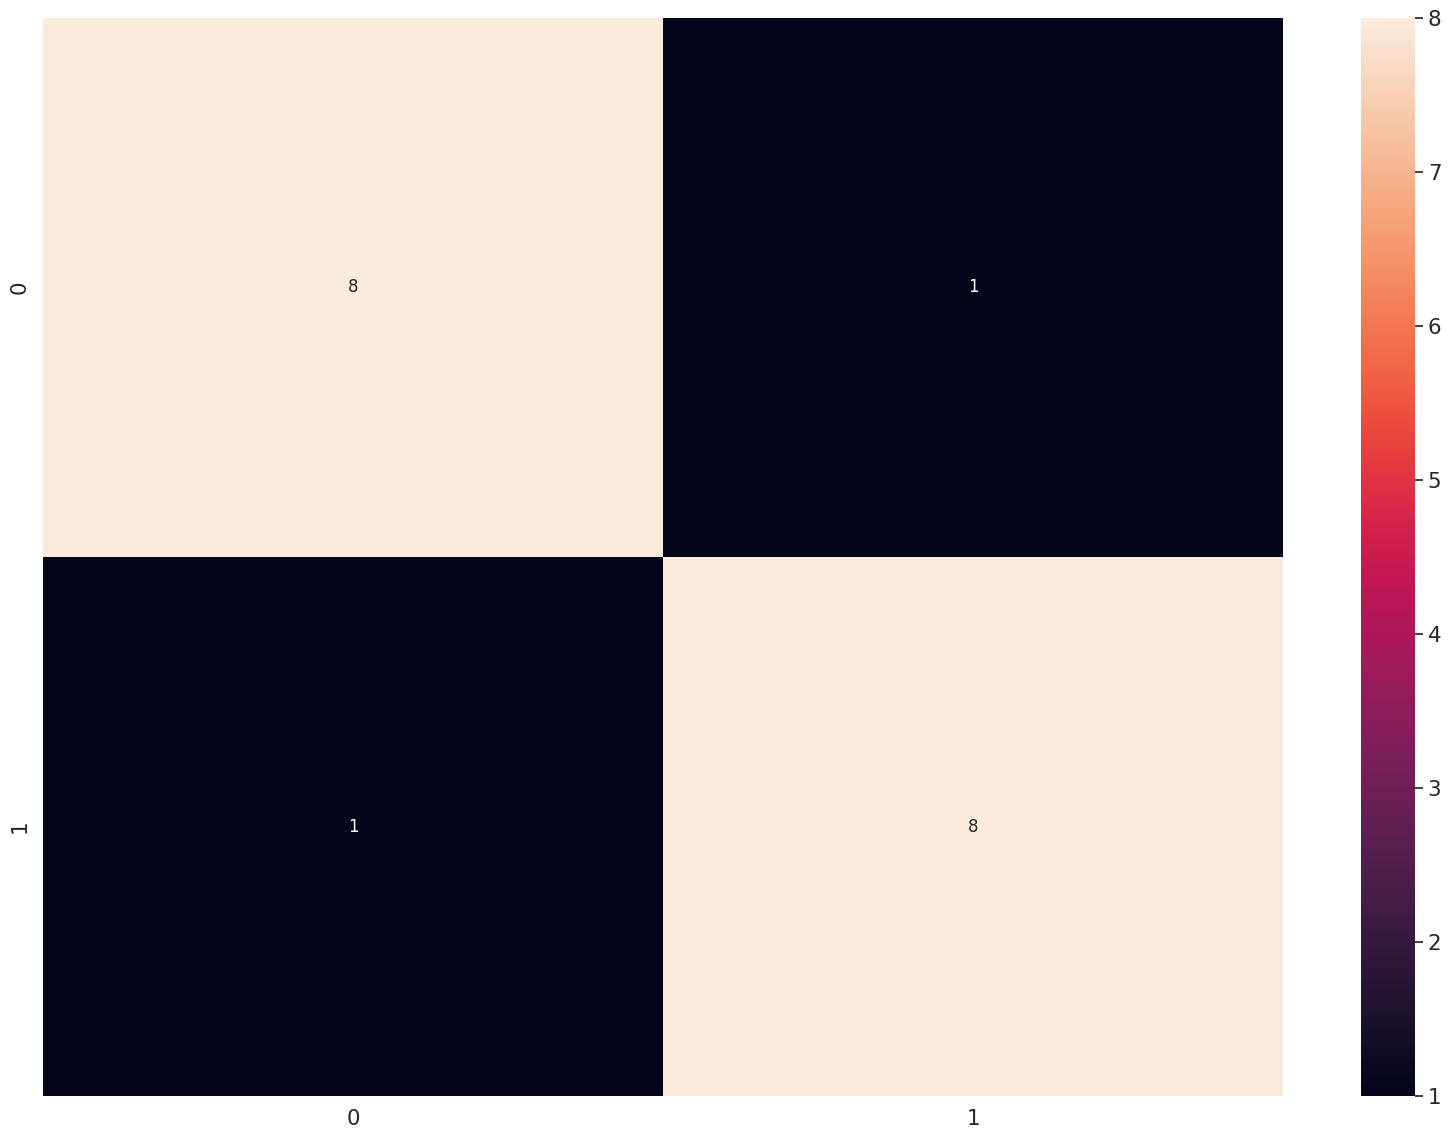

Accuracy: 0.8888888888888888
F1 score: 0.8888888888888888
Recall: 0.8888888888888888
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18


 confusion matrix:
 [[8 1]
 [1 8]]


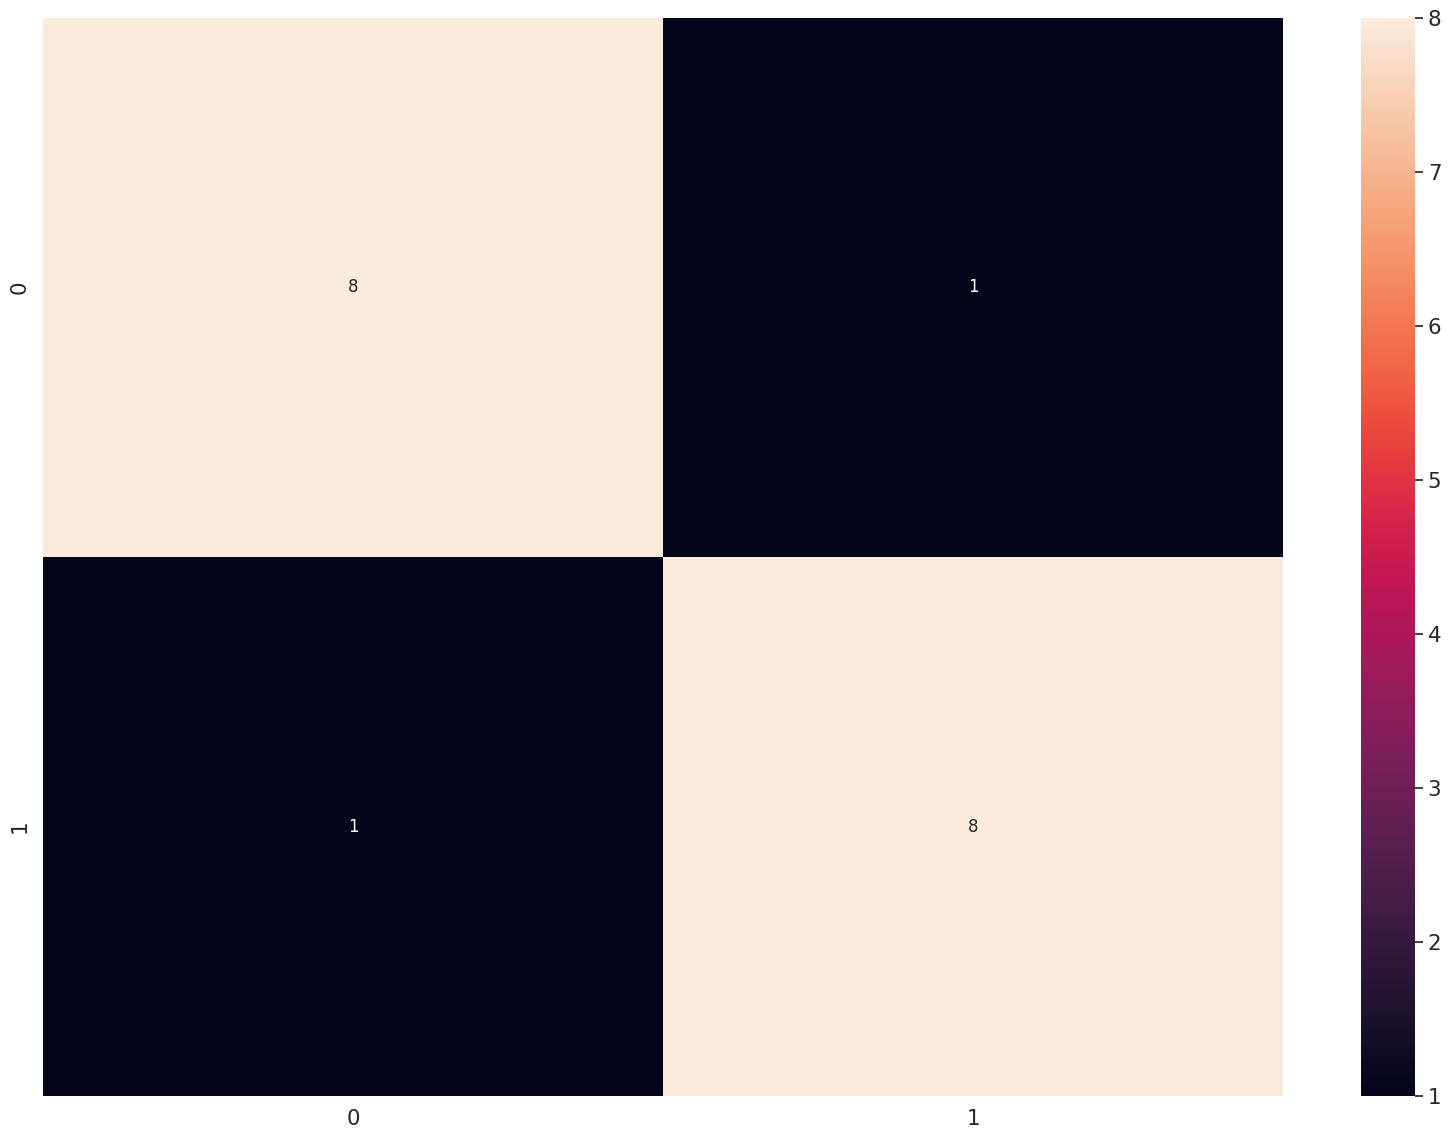

In [50]:
NB = GaussianNB()

NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
metrics(Y_validation,predictions)

NB.fit(X_trainScaler, Y_trainScaler)
predictions = NB.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

NB.fit(X_trainPCA, Y_train)
predictions = NB.predict(X_validationPCA)
metrics(Y_validation,predictions)

NB.fit(X_trainPCAScaler, Y_trainScaler)
predictions =NB.predict(X_validationPCAScaler)
metrics(Y_validationScaler,predictions)

## **5.MLP**

In [51]:
limit=1050
step=50
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    MLP = MLPClassifier(solver='lbfgs', alpha=.5, hidden_layer_sizes=(i))
    MLP.fit(X_train, Y_train)
    trainScore=MLP.score(X_train,Y_train)
    validationScore=MLP.score(X_validation,Y_validation)

    MLP.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=MLP.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=MLP.score(X_validationScaler,Y_validationScaler)

    MLP.fit(X_trainPCA, Y_train)
    trainScorePCA=MLP.score(X_trainPCA,Y_train)
    validationScorePCA=MLP.score(X_validationPCA,Y_validation)

    MLP.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=MLP.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=MLP.score(X_validationPCAScaler,Y_validationScaler)

    ytrain[index]=trainScore
    yValidation[index]=validationScore

    ytrainScaler[index]=trainScoreScaler
    yValidationScaler[index]=validationScoreScaler

    ytrainPCA[index]=trainScorePCA
    yValidationPCA[index]=validationScorePCA

    ytrainPCAScaler[index]=trainScorePCAScaler
    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 50


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


it: 100


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 150


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 200


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


it: 250


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


it: 300


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 350


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


it: 400


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 450


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 500


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 550


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 600


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 650


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 700


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


it: 750


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 800


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 850


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 900


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 950


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

it: 1000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


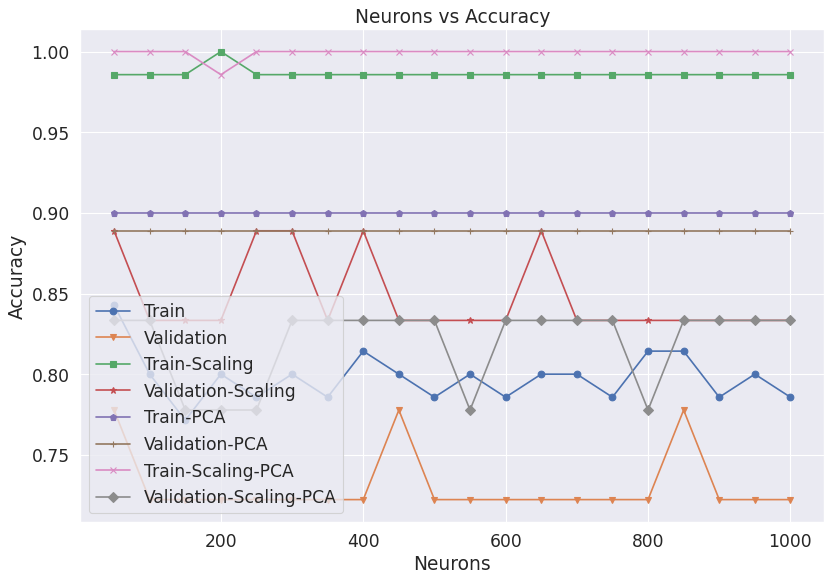

The best score with data validation:  0.7777777777777778 with Neurons:  50
The best score with data validation with Scaling:  0.8888888888888888 with Neurons:  50
The best score with data validation with PCA:  0.8888888888888888 with Neurons:  50
The best score with data validation with Scaling and PCA:  0.8333333333333334 with Neurons:  50


In [52]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('Neurons vs Accuracy')
plt.legend()
plt.savefig('MLP-Algorithm.png', dpi=100)
plt.show()
print('The best score with data validation: ', max(yValidation),'with Neurons: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with Neurons: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with Neurons: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with Neurons: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])



## **MLP Metrics**

Accuracy: 0.8888888888888888
F1 score: 0.8888888888888888
Recall: 0.8888888888888888
Precision: 0.8888888888888888

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18


 confusion matrix:
 [[8 1]
 [1 8]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


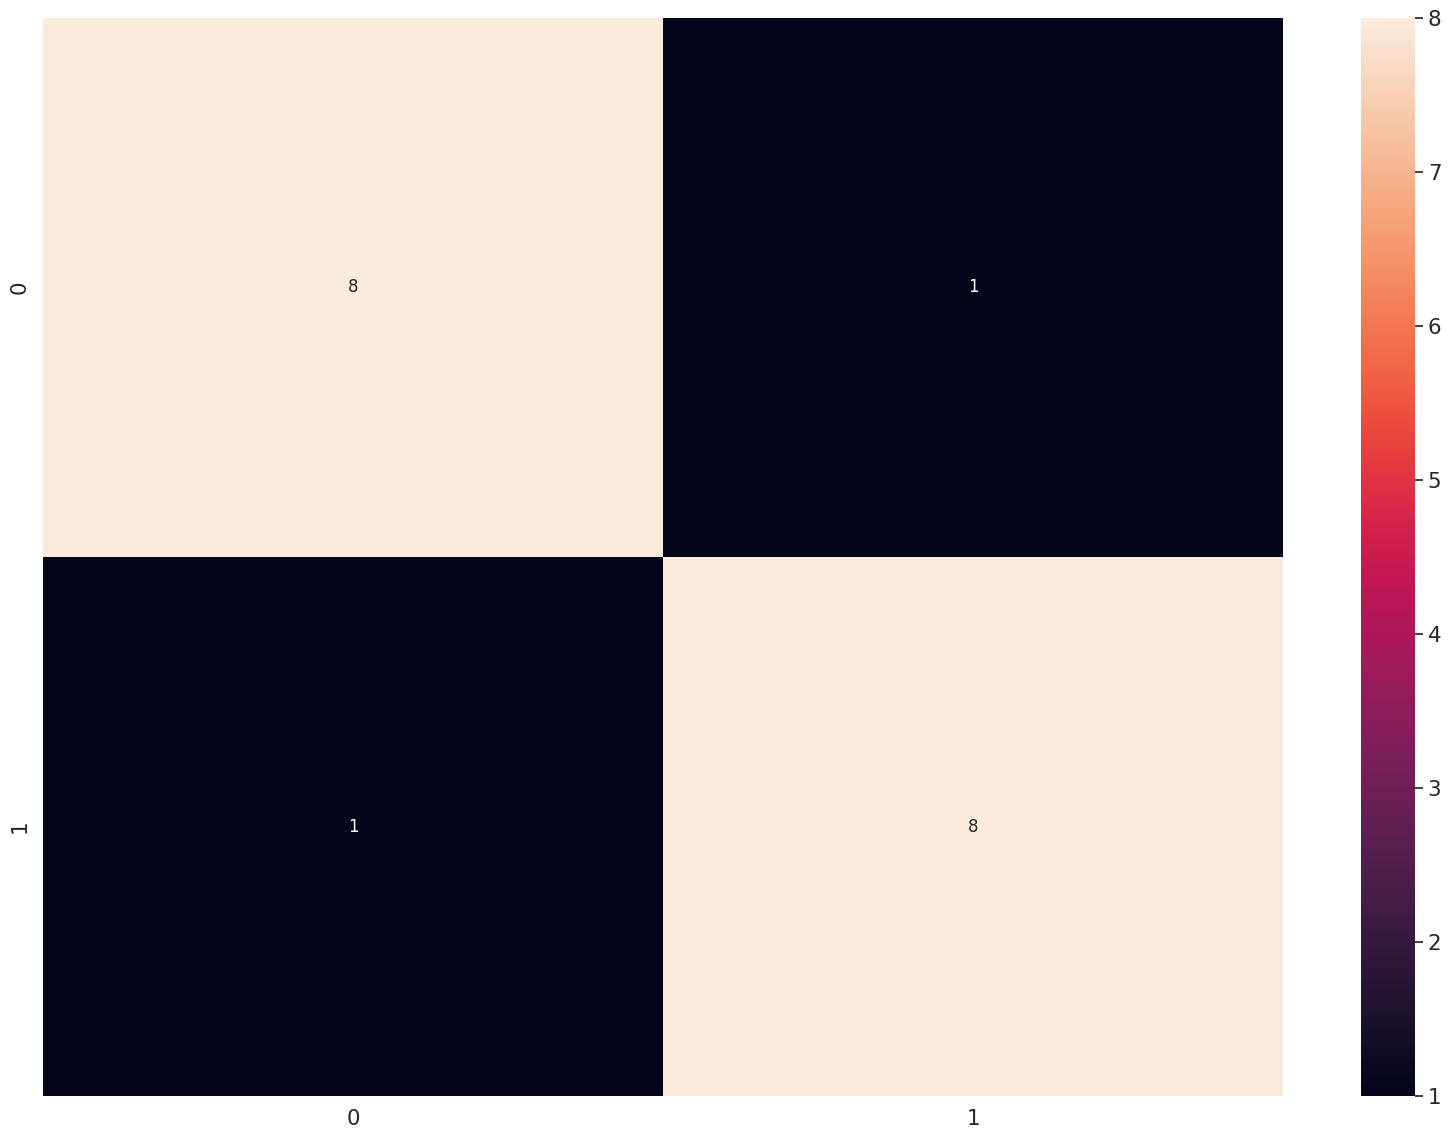

In [53]:
MLP = MLPClassifier(solver='lbfgs', alpha=.5, hidden_layer_sizes=x[yValidationPCA.index(max(yValidationPCA))])
MLP.fit(X_trainPCA, Y_train)
predictions = MLP.predict(X_validationPCA)
metrics(Y_validation,predictions)

## **6.RF Algorithm**

In [54]:
limit=100
n_features=80
step=10
x=[[[[w for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidation=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrain=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
indexi = 0
indexj = 0
indexk = 0
indexl = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(1,limit,step):
        indexk = 0
        for k in range(10,limit+10,step):
            indexl = 0
            for l in range(10,n_features,step):
                #
                RF = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, max_features=l, n_jobs=4)

                RF.fit(X_train, Y_train)
                trainScore = RF.score(X_train, Y_train)
                validationScore = RF.score(X_validation,Y_validation)

                RF.fit(X_trainScaler, Y_trainScaler)
                trainScoreScaler=RF.score(X_trainScaler,Y_trainScaler)
                validationScoreScaler=RF.score(X_validationScaler,Y_validationScaler)

                RF.fit(X_trainPCA, Y_train)
                trainScorePCA=RF.score(X_trainPCA,Y_train)
                validationScorePCA=RF.score(X_validationPCA,Y_validation)

                RF.fit(X_trainPCAScaler, Y_trainScaler)
                trainScorePCAScaler=RF.score(X_trainPCAScaler,Y_trainScaler)
                validationScorePCAScaler=RF.score(X_validationPCAScaler,Y_validationScaler)

                # print("%d,%d,%d,%d"%(indexi,indexj,indexk,indexl))
                ytrain[indexi][indexj][indexk][indexl]=trainScore
                yValidation[indexi][indexj][indexk][indexl]=validationScore

                ytrainScaler[indexi][indexj][indexk][indexl]=trainScoreScaler
                yValidationScaler[indexi][indexj][indexk][indexl]=validationScoreScaler

                ytrainPCA[indexi][indexj][indexk][indexl]=trainScorePCA
                yValidationPCA[indexi][indexj][indexk][indexl]=validationScorePCA

                ytrainPCAScaler[indexi][indexj][indexk][indexl]=trainScorePCAScaler
                yValidationPCAScaler[indexi][indexj][indexk][indexl]=validationScorePCAScaler
                indexl += 1
            indexk += 1
        indexj += 1
    indexi += 1
    print('n_estimators:',i)

n_estimators: 1
n_estimators: 11
n_estimators: 21
n_estimators: 31
n_estimators: 41


KeyboardInterrupt: ignored

In [55]:
indexes = [0 for x in range(16)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            for l in range(len(yValidation[i][j][k])):
                if yValidation[i][j][k][l] >= bestdata:
                    bestdata = yValidation[i][j][k][l]
                    indexes[0] = i
                    indexes[1] = j
                    indexes[2] = k
                    indexes[3] = l
                if yValidationScaler[i][j][k][l] >= bestscaling:
                    bestscaling = yValidationScaler[i][j][k][l]
                    indexes[4] = i
                    indexes[5] = j
                    indexes[6] = k
                    indexes[7] = l
                if yValidationPCA[i][j][k][l] >= bestpca:
                    bestpca = yValidationPCA[i][j][k][l]
                    indexes[8] = i
                    indexes[9] = j
                    indexes[10] = k
                    indexes[11] = l
                if yValidationPCAScaler[i][j][k][l] >= bestpcascaling:
                    bestpcascaling = yValidationPCAScaler[i][j][k][l]
                    indexes[12] = i
                    indexes[13] = j
                    indexes[14] = k
                    indexes[15] = l

print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2], ', ', indexes[3])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[4], ', ', indexes[5], ', ', indexes[6], ', ', indexes[7])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[8], ', ', indexes[9], ', ', indexes[10], ', ', indexes[11])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[12], ', ', indexes[13], ', ', indexes[14], ', ', indexes[15])


The best score with data validation:  1.0 with parameters:  2 ,  8 ,  3 ,  2
The best score with data validation with Scaling:  1.0 with parameters:  0 ,  6 ,  0 ,  6
The best score with data validation with PCA:  0.9444444444444444 with parameters:  5 ,  9 ,  3 ,  6
The best score with data validation with Scaling and PCA:  1.0 with parameters:  2 ,  9 ,  2 ,  2


## **RF Metrics**

In [ ]:
RF = RandomForestClassifier(n_estimators=81,  max_depth=91, min_samples_split=10, max_features=50
, n_jobs=4)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)
metrics(Y_validation,predictions)

## **7.DT Algorithm**

In [ ]:
limit=100
n_features=80
step=10
x=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidation=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrain=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
indexi = 0
indexj = 0
indexk = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(10, limit+10,step):
        indexk = 0
        for k in range(10, n_features,step):
            DT = DecisionTreeClassifier(max_depth=i, min_samples_split=j, max_features=k)

            DT.fit(X_train, Y_train)
            trainScore = DT.score(X_train, Y_train)
            validationScore = DT.score(X_validation,Y_validation)

            DT.fit(X_trainScaler, Y_trainScaler)
            trainScoreScaler=DT.score(X_trainScaler,Y_trainScaler)
            validationScoreScaler=DT.score(X_validationScaler,Y_validationScaler)

            DT.fit(X_trainPCA, Y_train)
            trainScorePCA=DT.score(X_trainPCA,Y_train)
            validationScorePCA=DT.score(X_validationPCA,Y_validation)

            DT.fit(X_trainPCAScaler, Y_trainScaler)
            trainScorePCAScaler=DT.score(X_trainPCAScaler,Y_trainScaler)
            validationScorePCAScaler=DT.score(X_validationPCAScaler,Y_validationScaler)

            ytrain[indexi][indexj][indexk]=trainScore
            yValidation[indexi][indexj][indexk]=validationScore

            ytrainScaler[indexi][indexj][indexk]=trainScoreScaler
            yValidationScaler[indexi][indexj][indexk]=validationScoreScaler

            ytrainPCA[indexi][indexj][indexk]=trainScorePCA
            yValidationPCA[indexi][indexj][indexk]=validationScorePCA

            ytrainPCAScaler[indexi][indexj][indexk]=trainScorePCAScaler
            yValidationPCAScaler[indexi][indexj][indexk]=validationScorePCAScaler
            indexk += 1
        indexj += 1
    indexi += 1
    print('Depth: ',i)

In [ ]:
indexes = [0 for x in range(12)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            if yValidation[i][j][k] >= bestdata:
                bestdata = yValidation[i][j][k]
                indexes[0] = i
                indexes[1] = j
                indexes[2] = k
            if yValidationScaler[i][j][k] >= bestscaling:
                bestscaling = yValidationScaler[i][j][k]
                indexes[3] = i
                indexes[4] = j
                indexes[5] = k
            if yValidationPCA[i][j][k] >= bestpca:
                bestpca = yValidationPCA[i][j][k]
                indexes[6] = i
                indexes[7] = j
                indexes[8] = k
            if yValidationPCAScaler[i][j][k] >= bestpcascaling:
                bestpcascaling = yValidationPCAScaler[i][j][k]
                indexes[9] = i
                indexes[10] = j
                indexes[11] = k

print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[3], ', ', indexes[4], ', ', indexes[5])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[6], ', ', indexes[7], ', ', indexes[8])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[9], ', ', indexes[10], ', ', indexes[11])


## **DT Metrics**

In [ ]:
DT = DecisionTreeClassifier(max_depth=81, min_samples_split=10, max_features=30)
DT.fit(X_trainPCA, Y_train)
predictions = DT.predict(X_validationPCA)
metrics(Y_validation,predictions)

## **8.K-Means Algorithm**

In [ ]:
limit=17
step=1
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_train)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_train[mask])[0]
    validationScore=accuracy_score(Y_train, labels)

    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_trainScaler)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_trainScaler[mask])[0]
    validationScoreScaler=accuracy_score(Y_trainScaler, labels)

    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_trainPCA)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_train[mask])[0]
    validationScorePCA=accuracy_score(Y_train, labels)

    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_trainPCAScaler)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_trainScaler[mask])[0]
    validationScorePCAScaler=accuracy_score(Y_trainScaler, labels)

    yValidation[index]=validationScore

    yValidationScaler[index]=validationScoreScaler

    yValidationPCA[index]=validationScorePCA

    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1

In [ ]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.title('Clusters vs Accuracy')
plt.legend()
plt.savefig('Clusters-Algorithm.png', dpi=100)
plt.show()
print('The best score with data validation: ', max(yValidation),'with Clusters: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with Clusters: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with Clusters: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with Clusters: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])


## **KMeans Metrics**

In [ ]:
KM = KMeans(n_clusters=11, random_state=0)
clusters =KM.fit_predict(X_trainPCA)
labels = np.zeros_like(clusters)
for j in range(10):
    mask = (clusters == j)
    labels[mask] = mode(Y_train[mask])[0]
metrics(Y_train, labels)

In [ ]:
Y_train

In [ ]:
clusters


## **Cross Validation**

In [ ]:
seed = 42
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('KM', KMeans()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    #segmentar la base de datos de entrenamiento en 10 partes
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #probar los grupos en cada modelp
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #almacena resultados
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

KNN = KNeighborsClassifier(n_neighbors=1)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(KNN, X_train,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('KNN')
msg = "%s: %f (%f)" % ('KNN', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

svc = SVC(C=70, gamma=1e-6)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(svc, X_trainScaler,Y_trainScaler, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('svc')
msg = "%s: %f (%f)" % ('svc', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

lr = LogisticRegression(C=0.1)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(lr, X_train,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('lr')
msg = "%s: %f (%f)" % ('lr', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

lda = LinearDiscriminantAnalysis()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(lda, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('lda')
msg = "%s: %f (%f)" % ('lda', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

nb = GaussianNB()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(nb, X_train,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('nb')
msg = "%s: %f (%f)" % ('nb', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

rf = RandomForestClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(rf, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('rf')
msg = "%s: %f (%f)" % ('rf', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

dt = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(dt, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('dt')
msg = "%s: %f (%f)" % ('dt', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

mlp = MLPClassifier(solver='lbfgs', alpha=.5, hidden_layer_sizes=(950))
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(mlp, X_trainPCA,Y_train, cv=kfold, scoring=scoring, verbose=1)
results.append(cv_results)
names.append('mlp')
msg = "%s: %f (%f)" % ('mlp', cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
seed=7
results = []
names = []
scoring = 'accuracy'

KM = KMeans(n_clusters=11, random_state=0)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(KM, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('KM')
msg = "%s: %f (%f)" % ('KM', cv_results.mean(), cv_results.std())
print(msg)

## **Keras-DL**

In [65]:
X_trainScaler

array([[-2.7411764 , -2.60967396, -1.65249848, -3.69713317, -3.22821832,
        -1.74052772, -3.27796563, -1.95575739, -0.80508542, -0.89874961],
       [ 1.03942368,  1.0042929 ,  0.98047605,  0.73532561,  0.2725934 ,
         0.57409293,  1.17658215,  1.31765798, -0.26623567,  0.31324402],
       [-0.58839942, -0.76006207, -0.48872218,  0.10406799, -1.34238873,
        -0.74114985,  0.78178289, -1.123639  , -0.91998384, -0.89918926],
       [ 0.04865946,  0.53016618, -0.97463932,  0.85314436, -0.40066416,
        -0.09634798,  0.77778831,  0.34223281,  0.53171714, -0.52879571],
       [-1.24146974, -0.48128932, -1.09193816, -0.83036034, -1.26865678,
         0.09842844,  0.33955435,  0.16942803, -0.82979954, -0.37361411],
       [ 0.85588726,  0.40814599,  0.41438943, -0.56019686, -0.49175115,
         0.1503823 ,  0.20865917,  1.64727813,  1.36470531, -0.01277734],
       [-0.0398979 ,  0.51877381, -0.81937238,  1.01174563, -0.01063258,
         0.52131477,  1.27349925, -0.00895047

In [66]:
Y_trainScaler

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1])

In [67]:
Y_validationScaler

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [68]:
X_validationScaler

array([[ 0.74653926,  0.27500236,  1.75657171,  1.1515854 ,  0.92213311,
         1.69903411,  0.63437758,  0.13270117,  0.44765196,  1.43670548],
       [-1.18368087, -1.7360919 , -1.93588836, -1.98157706, -1.06863602,
        -0.51328947, -1.66194852, -0.5822579 , -1.16726174, -0.77578616],
       [-1.37663339, -0.94719349, -0.00474331, -2.04578516, -1.03774767,
        -2.28272563, -0.54297072,  0.77658723, -0.26565386, -0.86178448],
       [ 1.10251855, -0.55551634,  0.39910449,  0.04903224,  2.00076248,
         1.59877083,  0.88401138,  1.4177059 ,  0.65085293, -0.20080442],
       [ 0.09192268, -0.87920578, -0.04096413,  0.92576452,  0.29556845,
         0.88011005, -0.76199384, -0.80763406, -0.81422812, -1.06036688],
       [-0.82356328, -0.55699605, -0.78598644,  0.4900767 , -0.71178665,
         0.68596915,  0.54557325,  2.918236  ,  0.43782745, -0.80525788],
       [ 0.41183304,  0.05226508, -0.8359421 , -0.00962083,  0.24856873,
         0.46777722, -0.80522694, -0.01660809

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_20 (Dense)            (None, 50)                550       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 2)                 102       
                                                                 
Total params: 5,752
Trainable params: 5,752
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
1/1 [==============================] - 5s

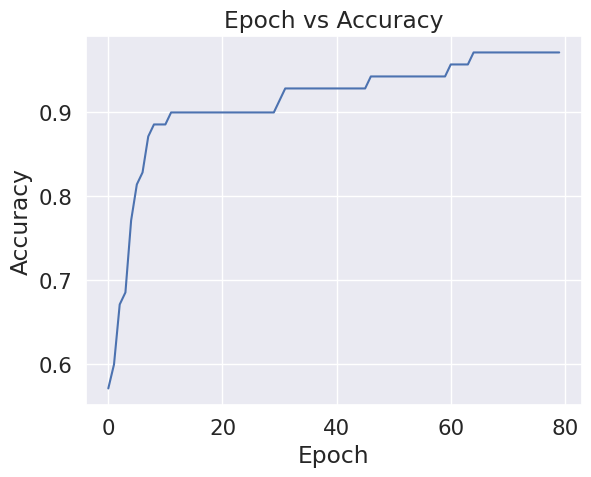

Baseline Error: 16.67%


In [64]:
encoded_YTrain = Y_trainScaler
encoded_YValidation = Y_validationScaler
encode_XTrain=X_trainScaler
encode_Xvalidation=X_validationScaler

# Multilayer Perceptron
one_hot_labels_train = keras.utils.to_categorical(encoded_YTrain, num_classes=2)
one_hot_labels_validation = keras.utils.to_categorical(encoded_YValidation, num_classes=2)
visible = Input(shape=(encode_XTrain.shape[1],))
hidden1 = Dense(50, activation='relu')(visible)
#Dropout(0.1)
hidden2 = Dense(50, activation='relu')(hidden1)
#Dropout(0.1)
hidden3 = Dense(50, activation='relu')(hidden2)
#Dropout(0.1)
output = Dense(2, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['acc', 'mse','mae','mape'])
# summarize layers
print(model.summary())
# Fit the model
history=model.fit(encode_XTrain, one_hot_labels_train, epochs=80, batch_size=139)

# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
scores = model.evaluate(encode_Xvalidation, one_hot_labels_validation, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=139, verbose=1)
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(one_hot_labels_validation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

In [ ]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(one_hot_labels_validation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))
plt.figure(figsize = (20,14))
sn.set(font_scale=1.4) #for label size
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

In [ ]:
snn_report = classification_report(np.argmax(one_hot_labels_validation, axis=1), snn_predicted)
print(snn_report)

## **Deep Learning using KERAS**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 6, 32)             128       
                                                                 
 conv1d_16 (Conv1D)          (None, 4, 32)             3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 conv1d_17 (Conv1D)          (None, 2, 32)             3104      
                                                                 
 flatten_5 (Flatten)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 100)               6500      
                                                      

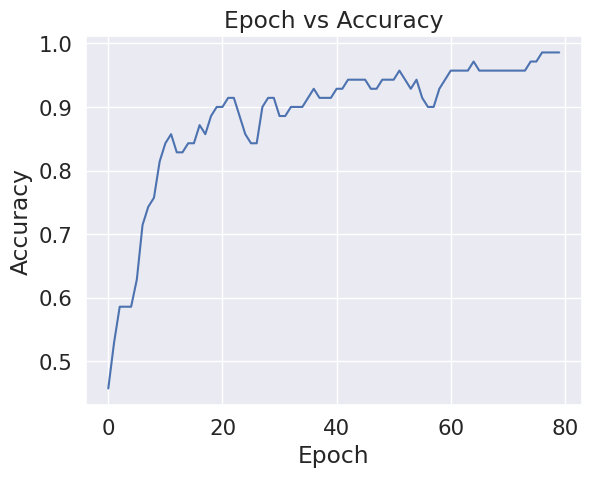

In [61]:
encoder = LabelEncoder()
encoder.fit(Y_trainScaler)
encoded_YTrain = encoder.transform(Y_trainScaler)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=X_trainPCAScaler.reshape(X_trainPCAScaler.shape[0],X_trainPCAScaler.shape[1],1)
encode_Xvalidation=X_validationPCAScaler.reshape(X_validationPCAScaler.shape[0],X_validationPCAScaler.shape[1],1)
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
#model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
#model.add(Conv1D(32, 1, activation='relu'))
#model.add(MaxPooling1D(3))
model.add(Flatten())
#model.add(GlobalAveragePooling1D())
#model.add(Dense(100, activation='softsign'))
#model.add(Dropout(0.5))
model.add(Dense(100, activation='softsign'))

model.add(Dense(2,activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize layers
print(model.summary())



history=model.fit(encode_XTrain,categorical_YTrain, epochs=80, batch_size=64)

# plot metrics
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
#

In [ ]:
scores = model.evaluate(encode_Xvalidation,categorical_YValidation , verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
scores

In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=30, verbose=1)
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

In [ ]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(keras.utils.to_categorical(encoded_YValidation, num_classes=11), axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))
plt.figure(figsize = (20,14))
sn.set(font_scale=1.4) #for label size
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

In [ ]:
snn_report = classification_report(np.argmax(keras.utils.to_categorical(encoded_YValidation, num_classes=11), axis=1), snn_predicted)
print(snn_report)

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y_trainScaler)
encoded_YTrain = encoder.transform(Y_trainScaler)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=X_trainPCAScaler
encode_Xvalidation=X_validationPCAScaler
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)



# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(11, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
batch_size = [10, 20,30, 40,50, 60,70, 80,90, 100]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune the Training Optimization Algorithm

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(11, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Learning Rate and Momentum



def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(11, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Network Weight Initialization

def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(100,kernel_initializer=init_mode, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(11, kernel_initializer=init_mode, activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)

In [ ]:
# How to Tune the Neuron Activation Function

def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(100,kernel_initializer='normal', input_dim=encode_XTrain.shape[1], activation=activation))
    model.add(Dense(100, kernel_initializer='normal', activation=activation))
    model.add(Dense(100, kernel_initializer='normal', activation=activation))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
 How to Tune Dropout Regularization
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(100,kernel_initializer='normal', input_dim=encode_XTrain.shape[1], activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

from keras.layers import Dropout
from keras.constraints import maxnorm

def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons,kernel_initializer='normal', input_dim=encode_XTrain.shape[1], activation='softsign'))
    model.add(Dense(neurons, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(neurons, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
neurons = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], kernel_initializer='normal', activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=20, verbose=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator,encode_XTrain, categorical_YTrain, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=encode_XTrain.shape[1], kernel_initializer='normal', activation='softsign'))
model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
optimizer = SGD(lr=0.2, momentum=0)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(encode_XTrain, categorical_YTrain, epochs=100, batch_size=20)
# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
#

In [ ]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=20, verbose=1)
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

In [ ]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))
plt.figure(figsize = (20,14))
sn.set(font_scale=1.4) #for label size
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

In [ ]:
snn_report = classification_report(np.argmax(categorical_YValidation, axis=1), snn_predicted)
print(snn_report)

In [ ]:
encoder = LabelEncoder()
encoder.fit(label_vectors)
encoded_YTrain = encoder.transform(label_vectors)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=feature_vectorsPCA_Scaler.reshape(feature_vectorsPCA_Scaler.shape[0],feature_vectorsPCA_Scaler.shape[1],1)
encode_Xvalidation=X_validationPCAScaler
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)

## **CNN using Keras**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign'))
    model.add(Dense(11,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# How to Tune Batch Size and Number of Epochs

model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
batch_size = [10,50,100]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune the Training Optimization Algorithm

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign'))
    model.add(Dense(11,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Learning Rate and Momentum
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign'))
    model.add(Dense(11,activation='softmax'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

def create_model(init_mode='uniform'):
    # create model
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer=init_mode, activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer=init_mode, activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer=init_mode, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer=init_mode))
    model.add(Dense(11,activation='softmax', kernel_initializer=init_mode))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation=activation, input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation=activation))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation=activation))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Dropout Regularization
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation='linear'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation='linear'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune the Number of Neurons in the Hidden Layer
def create_model(filters=1,kernel_size=1):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=(kernel_size),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=filters, kernel_size=(kernel_size),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(MaxPooling1D(1))
   # model.add(Dropout(0.4))
    model.add(Conv1D(filters=filters, kernel_size=(kernel_size),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
filters = [1, 16, 32, 64,128,256]
kernel_size = [1,3,5,7]
param_grid = dict(filters=filters,kernel_size=kernel_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(MaxPooling1D(1))
    #model.add(Dropout(0.4))
    model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=10, verbose=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator,encode_XTrain, categorical_YTrain, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
encoder = LabelEncoder()
encoder.fit(label_vectors)
encoded_YTrain = encoder.transform(Y_trainScaler)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=X_trainPCAScaler.reshape(X_trainPCAScaler.shape[0],X_trainPCAScaler.shape[1],1)
encode_Xvalidation=X_validationPCAScaler.reshape(X_validationPCAScaler.shape[0],X_validationPCAScaler.shape[1],1)
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
model.add(MaxPooling1D(1))
    #model.add(Dropout(0.4))
model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
model.add(Flatten())
model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(encode_XTrain, categorical_YTrain, epochs=10, batch_size=10)
# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
#

In [ ]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=10, verbose=1)
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

In [ ]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))
plt.figure(figsize = (20,14))
sn.set(font_scale=1.4) #for label size
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()